# Download Dataset

In [1]:
# Function to play audios in notebook
using Base64

function inline_audioplayer(s, fs)
    buf = Base.IOBuffer()
    wavwrite(s, buf; Fs=fs)
    data = take!(buf) |> base64encode
    markup = """<audio controls="controls" {autoplay}>
                <source src="data:audio/wav;base64,$data" type="audio/wav" />
                Your browser does not support the audio element.
                </audio>"""
    display(MIME("text/html") ,markup)
end

inline_audioplayer (generic function with 1 method)

In [ ]:
# Uncomment these to download the dataset
# mkdir("../dataset")
# cd("../dataset") do
#     run(`wget http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip`) 
#     run(`unzip mini_speech_commands.zip`)
# end
using Markdown

Markdown.parse_file("../dataset/mini_speech_commands/README.md")

In [2]:
# The Evaliable Commands
commands = [c for c=readdir("../dataset/mini_speech_commands") if c!="README.md"]
# Read Commands in order TF processed it
#commands = split(strip(open(f->read(f,String),"../dataset/TF/commands.txt")),"\n")


8-element Vector{String}:
 "down"
 "go"
 "left"
 "no"
 "right"
 "stop"
 "up"
 "yes"

In [3]:
# Read out files 

# Gather file pathes
using Glob
using Random
filenames = glob("../dataset/mini_speech_commands/*/*") |> shuffle
num_examples = length(readdir("../dataset/mini_speech_commands/$(commands[1])"))
println("Number of total examples: ",length(filenames))
println("Number of examples per label: ", num_examples)
println("Example File Tensor: ", filenames[1])

# Separate the data set in training data, validation data and test data

train_files = filenames[1:6400]
val_files = filenames[6401:7200]
test_files = filenames[7201:8000]

println("Training set size: ", length(train_files))
println("Validation set size: ", length(val_files))
println("Test set size: ", length(test_files))

Number of total examples: 8000
Number of examples per label: 1000
Example File Tensor: ../dataset/mini_speech_commands/right/30137d34_nohash_0.wav


800-element Vector{String}:
 "../dataset/mini_speech_commands/yes/73af0c50_nohash_0.wav"
 "../dataset/mini_speech_commands/right/f5733968_nohash_0.wav"
 "../dataset/mini_speech_commands/up/b4aa9fef_nohash_0.wav"
 "../dataset/mini_speech_commands/stop/cf87b736_nohash_0.wav"
 "../dataset/mini_speech_commands/yes/716757ce_nohash_0.wav"
 "../dataset/mini_speech_commands/yes/a8e25ebb_nohash_0.wav"
 "../dataset/mini_speech_commands/yes/611d2b50_nohash_3.wav"
 "../dataset/mini_speech_commands/down/884ae8e1_nohash_0.wav"
 "../dataset/mini_speech_commands/no/06a79a03_nohash_2.wav"
 "../dataset/mini_speech_commands/up/f428ca69_nohash_0.wav"
 "../dataset/mini_speech_commands/up/da584bc0_nohash_4.wav"
 "../dataset/mini_speech_commands/go/3a182c98_nohash_1.wav"
 "../dataset/mini_speech_commands/up/ced835d3_nohash_3.wav"
 ⋮
 "../dataset/mini_speech_commands/left/5fadb538_nohash_1.wav"
 "../dataset/mini_speech_commands/yes/6a203e0e_nohash_0.wav"
 "../dataset/mini_speech_commands/down/db9cd41d_nohash_

In [4]:
# Check loading WAVs
using WAV
test_audio, fs = wavread("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")
@show fs
@show size(test_audio)
inline_audioplayer(test_audio,fs)

fs = 16000.0f0
size(test_audio) = (13654, 1)


<source src="data:audio/wav;base64,UklGRpTVAABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YVjVAADQAeg6iAFEO3QBOjuMAUY7RAEiO5wBTjtoATQ7AAEAOwgBBDv4Afw62AHsOiABkDrgAfA6EAEIO3ABuDoYAQw7RAEiO3QBOjssARY7oAHQOjgBHDtsATY7cAE4O5ABSDt8AT47TAEmOzgBHDsUAQo7dAE6OzwBHjskARI7fAE+O5gBTDuwAVg7pAFSOwQBgjusAVY7RAEiO0gBJDsQAQg7IAEQOyQBEjskARI7ZAEyO4ABQDuoAVQ77AF2O7ABWDtMASY7bAE2O4wBRjt4ATw7hAFCO9QBajusAVY7bAE2O5ABSDvAAWA73AFuO7QBWjuwAVg7gAFAO8gBZDvkAXI7rAFWO6gBVDuAAUA7tAFaO5QBSjukAVI7gAFAO4gBRDu4AVw7pAFSOwIBgTvMAWY7AgGBOxQBiju4AVw7xAFiO+QBcjv4AXw7/AF+OwABgDsWAYs7FgGLOx4BjzsmAZM7CAGEOwoBhTsKAYU7hAFCO0gBJDtQASg7DAEGOxwBDjsIAQQ7MAEYO2gBNDsEAQI7CAEEOzABGDsYAQw7MAEYO1gBLDt4ATw7sAFYO3wBPjtcAS47VAEqO0ABIDtUASo7UAEoO1gBLDtYASw7MAEYOzgBHDuYAUw7ZAEyO2QBMju4AVw74AFwOwIBgTvcAW47yAFkOwABgDsGAYM7AgGBOwYBgzsEAYI7AgGBO8wBZjvkAXI7EAGIOwABgDsoAZQ7IAGQOwwBhjs0AZo7DgGHO9wBbjsYAYw7DAGGO8QBYjsIAYQ78AF4OwIBgTsSAYk7HgGPO0ABoDsyAZk7KgGVOyIBkTsSAYk74AFwO/ABeDv0AXo74AFwOwQBgjsqAZU7DgGHOwIBgTsyAZk7FgGLO+gBdDu4AVw7oAFQOwABgDsKAYU7GAGMOyABkDsgAZA7MAGYO9QBajuUAUo7aAE0O2QBMjs8AR47FAEKO7ABWDu8AV47hAFCO8gBZDsAAYA70AFoOwYBgzsUAYo74AFwO8gBZDtwATg7OAEcO3gBPDvEAWI74AFwOxIBiTvcAW47iAFEO+QBcjsEAYI79AF6O4ABQDscAQ47NAEaOxwBDjtAASA7UAEoOzgBHDtYASw7PAEeO2QBMjs0ARo7MAEYO2ABMDtYASw7fAE+OyABEDuYAcw6qAHUOsAB4DogARA7TAEmO1QBKjtoATQ7HAEOO8gB5DokARI7RAEiO6wBVjvUAWo7wAFgO9ABaDtcAS47XAEuO3gBPDtsATY7ZAEyO1gBLDs0ARo7EAEIOyQBEjs4ARw7TAEmO0QBIjtYASw7VAEqOzABGDtYASw7WAEsO4gBRDvMAWY7dAE6O1QBKjtoATQ7hAFCO3gBPDtAASA7JAESOxQBCjuYAcw6eAG8OgwBBjtAASA7jAFGO+ABcDucAU47QAEgO3QBOjtIASQ7aAE0O5wBTjsUAQo7KAEUO2gBNDtUASo7yAHkOtAB6DoIAQQ7oAHQOiQBEjsYAQw7BAECO0QBIjt0ATo7kAFIO1wBLjuEAUI7mAFMOzQBGjuYAUw7gAFAOywBFjtUASo7EAEIOzgBHDsEAQI7qAHUOjABGDtIASQ7SAEkOwwBBjsUAQo7RAEiOywBFjuoAdQ6sAHYOsAB4DqIAcQ6AAEAOwQBAjssARY7FAEKO/gB/Dr4Afw6KAEUOyABEDsMAQY7RAEiO/gB/DqcAU473AFuO4gBRDtgATA7UAEoO2QBMjs0ARo7KAEUO7AB2DqgAdA6CAEEOwQBAjtgAbA60AFoOhABiDrQAeg6+AH8OgABADsUAQo72AHsOigBFDtUASo7lAFKO0ABIDsMAQY7MAEYO8AB4DoAAQA72AHsOhwBDjt4ATw7cAE4OzwBHjtAASA7gAFAOyQBEjtAASA7JAESO3ABuDoYAQw78AH4OoABwDoIAQQ72AHsOhABCDs4ARw7EAEIO4ABQDuEAUI7fAE+O5gBTDugAVA7mAFMO4ABQDuIAUQ7XAEuO2ABMDtcAS477AF2Ox4BjzukAVI7tAFaO/gBfDuUAUo7oAFQO3wBPjs0ARo7jAFGO1gBLDvgAfA6kAHIOpgBzDp4Abw6qAHUOggBBDsoAZQ6YAGwOigBFDsMAQY7dAE6O7gBXDvAAWA7nAFOO3ABODvYAWw7sAFYO4ABQDuIAUQ7tAFaO/gBfDsIAYQ75AFyOwQBgjvAAWA7PAEeO2wBNjs4ARw7HAEOOzABmDowAZg6NAEaO6gB1DowAZg6YAEwOzwBHjsYAQw79AF6OwQBgjsYAYw7rAFWO8gBZDsGAYM7FAEKO5QBSjv4Afw6+AH8OngBPDvYAew6mAFMO5wBTjv4Afw6kAFIO/wBfjsgARA7jAFGO2YBszuOAcc7WgGtOyoBlTsQAYg7OAEcO4ABQDpQASg6oAHQOeABcDoYAQw7tAFaO/QBejvoAXQ7UAGoO6QB0ju6Ad07jgHHOwABgDtUASo7GAEMO1wBLjtUASo7GAEMO7gB3DqoAdQ6QAEgO4gBxDqAAUA6oAFQOpgBzDpMASY7NAEaOzgBHDscAQ47UAGoOigBlDpYAaw6MAGYOkABoDqQAUg6OAGcOlgBLDs0ARo7nAFOOwQBgjtwATg7KAEUOxwBDjuYAcw6cAG4OugB9DpwAbg64AHwOkgBJDuoAdQ6cAG4OsAB4DooAZQ6QAGgOsgB5DqQAcg6oAHQOtgB7DoMAQY74AHwOggBBDuMAUY7AAEAO3ABuDrwAfg6oAHQOhQBCjs4ARw7SAEkOxgBDDssARY7hAFCOxgBDDtsATY7iAFEO2QBMjtYASw7LAEWO2ABMDscAQ47QAEgO3wBPjtoATQ7sAFYOwABgDvUAWo7rAFWO5ABSDscAQ47NAEaOzQBGjtEASI7lAFKOzABGDsUAQo7VAEqO0QBIjscAQ47VAEqO0QBIjs4ARw7EAEIO2gBtDrAAeA6qAHUOhgBjDpQAag6LAEWOxQBCjtIASQ7eAE8O2wBNjvcAW47jAFGO4wBRjuYAUw7rAFWO+ABcDuMAUY7mAFMO7gBXDuMAUY7QAEgOwQBAjsAAQA7oAHQOsgB5DpAASA7aAE0O5QBSjtIASQ7ZAEyO3QBOjscAQ47xAFiO6wBVjt0ATo7hAFCO3gBPDvwAXg7wAFgO6wBVjucAU47dAE6O3gBPDvEAWI7EAGIO+ABcDsYAYw7JAGSOy4BlztEAaI7DAGGOxwBjjs6AZ07LAGWOxoBjTsIAYQ7+AF8OwYBgzugAVA7fAE+O9gBbDvIAWQ7oAFQO2QBMjtIASQ7kAFIO4wBRjuIAUQ7oAFQO1gBLDsAAQA7GAEMO1QBKjv4Afw6KAEUO1wBLjtkATI7dAE6OygBFDtAASA7ZAEyO3QBOjtUASo7BAECOywBFjtMASY7HAEOO7AB2DpwAbg6SAGkOmgBtDrwAfg6OAEcO1gBLDtUASo7ZAEyO8wBZjv0AXo7kAFIO8QBYjsGAYM74AFwO/ABeDuYAUw7aAE0O7wBXjukAVI7pAFSO6QBUjuoAVQ7oAFQO2gBNDugAVA7nAFOO4gBRDtgATA7SAEkOxgBDDsEAQI7TAEmO3wBPjucAU47bAE2O4ABQDuwAVg7aAE0O0gBJDu4AVw7BAGCO8wBZjvgAXA74AFwO/ABeDv4AXw7oAFQO9ABaDusAVY7ZAEyO2ABMDtIASQ7TAEmO1ABKDtIASQ7MAEYO3ABODs0ARo7LAEWO0gBJDtQASg7bAE2O0ABIDuoAVQ7/AF+O9ABaDvMAWY7EgGJO/ABeDugAVA7pAFSO6QBUjuAAUA7zAFmO/ABeDsAAYA7EAGIO6gBVDvoAXQ7EgGJOxwBjjsMAYY7sAFYO9ABaDvAAWA7dAE6O3gBPDvMA

In [5]:
# Function to load WAVs
function decode_audio(audio_binary)
    audio, fs = wavread(audio_binary)
    convert.(Float32,audio[:,1])
end
decode_audio("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")

13654-element Vector{Float32}:
 0.0017700735
 0.002990814
 0.0028382214
 0.0030213324
 0.0024719993
 0.0031434065
 0.0027466659
 0.0019531846
 0.0020142216
 0.0019226661
 0.001800592
 0.0010986663
 0.0018311106
 ⋮
 0.016907254
 0.019135106
 0.02026429
 0.02047792
 0.020020142
 0.02026429
 0.021698661
 0.023102513
 0.025818659
 0.025269326
 0.029725028
 0.017761772

In [6]:
# Function to get command label
function get_label(file_path)
    split(file_path,"/")[end-1] # For Windows System otherwise replace with /
end
get_label(filenames[1])

"right"

In [7]:
# Load waveforms
train_wf_x = decode_audio.(train_files)
train_wf_y = get_label.(train_files)
val_wf_x = decode_audio.(val_files)
val_wf_y = get_label.(val_files)
test_wf_x = decode_audio.(test_files)
test_wf_y = get_label.(test_files)

800-element Vector{SubString{String}}:
 "yes"
 "right"
 "up"
 "stop"
 "yes"
 "yes"
 "yes"
 "down"
 "no"
 "up"
 "up"
 "go"
 "up"
 ⋮
 "left"
 "yes"
 "down"
 "go"
 "left"
 "yes"
 "stop"
 "stop"
 "down"
 "no"
 "left"
 "stop"

In [9]:
using Plots

rows = 3
cols = 3

n = rows*cols

figs = [
    plot(
        (1:length(train_wf_x[i]))./1e3, train_wf_x[i],
        title = train_wf_y[i],
        label = "Julia",
        yticks = -1.2:0.4:1.2,
        ylim = (-1.3,1.3),
        xticks = 0:5:15,
        legend=true,
    )
    for i=1:n
]


plot(
    figs...,
    layout=(rows,cols),
    size=(600,800),
)

In [10]:
# Compute spectragrams (with stft)
# Compared to tf function the spectrogram from DSP.stft is transposed

using DSP

function get_spectrogram(waveform)
    input_len = 16000
    waveform = length(waveform) >= input_len ? 
                    waveform[1:input_len]    :
                    [convert.(Float32,waveform);zeros(Float32,input_len - length(waveform))]
    spectrogram = DSP.stft(
        waveform,
        255,
        255-128, 
        window=hanning,
        #fs=fs,
    ) |> x->abs.(x)
    spectrogram'
end

get_spectrogram(train_wf_x[1])

124×129 adjoint(::Matrix{Float32}) with eltype Float32:
 0.656577   1.3701    1.58616   0.619452  …  7.4701f-5    6.95586f-5
 0.639528   1.18566   1.4274    0.605102     6.03738f-5   3.016f-5
 0.08907    0.258705  0.584717  0.414424     3.20241f-5   4.62197f-5
 0.142276   0.118432  0.515505  0.61111      6.31244f-5   4.36902f-5
 0.061575   0.686966  0.979278  0.575631     0.000179582  0.000110205
 0.61238    1.22727   1.4072    0.743771  …  0.000136974  1.10865f-5
 0.346969   0.434223  0.60438   0.575377     6.35377f-5   1.45882f-5
 0.390156   0.279117  0.319252  0.604742     0.000203011  0.000224844
 0.423905   1.09642   1.28283   0.603183     0.000113438  0.000112608
 0.403969   1.22639   1.53461   0.711144     0.00012335   1.72853f-5
 0.368317   0.690432  0.784982  0.444029  …  0.00016277   0.000219986
 0.0194789  0.124828  0.486217  0.700032     4.93856f-5   5.21783f-5
 0.15144    0.478205  0.72793   0.378551     4.93863f-5   2.21208f-5
 ⋮                                        ⋱  

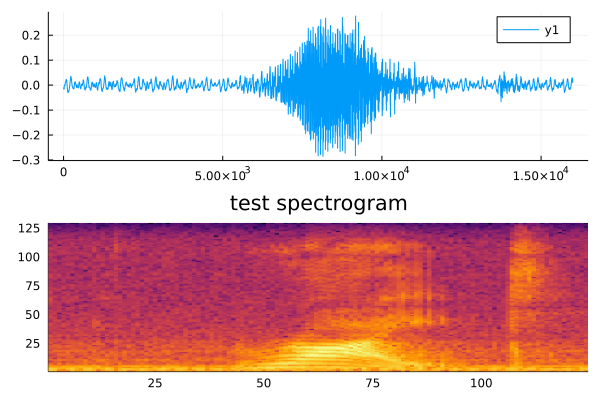

In [11]:
# Function to plot spectrograms
# I was too lazy to fix the xticks of the spectrogram

function plot_spectrogram(spectrogram, title)
    tmp = similar(spectrogram)
    if (length(size(spectrogram))>2)
        @assert length(size(spectrogram)) == 3
        tmp = spectrogram[:,:,1]
    else
        tmp = spectrogram
    end
    log_spec = log.(tmp .+ eps(Float32))
    heatmap(log_spec', legend=false, title=title)
end


# tst_waveform = decode_audio("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")
# tst_spectrogram = get_spectrogram(tst_waveform)
tst_spectrogram= get_spectrogram(train_wf_x[1])

p1 = plot(train_wf_x[1])
p2 = plot_spectrogram(tst_spectrogram, "test spectrogram")

plot(p1,p2, layout=(2,1))

size(x) = (124, 129, 1)
commands = ["down", "go", "left", "no", "right", "stop", "up", "yes"]


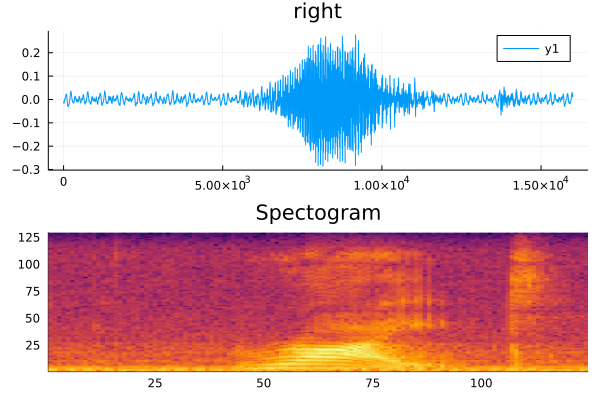

Bool[0, 0, 0, 0, 1, 0, 0, 0]


In [12]:
using Flux

# Function to get spectrogram label pairs
# Deviation from TF - I store labels in onehot format
function my_spectrogram(waveform)
    spectrogram = convert.(Float32,get_spectrogram(waveform))
    reshape(spectrogram,size(spectrogram)...,1)
end

get_label_id(label) = Flux.onehot(label,commands)


# Check the function
#x,y = get_spectrogram(train_wf_x[1]), get_label_id(train_wf_y[1])
x = my_spectrogram(train_wf_x[1])
y = get_label_id(train_wf_y[1])

p1 = plot(train_wf_x[1],title="$(train_wf_y[1])")
@show size(x)
p2 = plot_spectrogram(x, "Spectogram")
@show commands
plot(p1, p2, layout=(2,1)) |> display
println(y)

In [13]:
spectrogram_ds = get_spectrogram.(train_wf_x)
spectrogram_id = get_label_id.(train_wf_y)

6400-element Vector{Flux.OneHotArray{UInt32, 8, 0, 1, UInt32}}:
 [0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]

In [14]:
spectrogram_ds[1]

124×129 adjoint(::Matrix{Float32}) with eltype Float32:
 0.656577   1.3701    1.58616   0.619452  …  7.4701f-5    6.95586f-5
 0.639528   1.18566   1.4274    0.605102     6.03738f-5   3.016f-5
 0.08907    0.258705  0.584717  0.414424     3.20241f-5   4.62197f-5
 0.142276   0.118432  0.515505  0.61111      6.31244f-5   4.36902f-5
 0.061575   0.686966  0.979278  0.575631     0.000179582  0.000110205
 0.61238    1.22727   1.4072    0.743771  …  0.000136974  1.10865f-5
 0.346969   0.434223  0.60438   0.575377     6.35377f-5   1.45882f-5
 0.390156   0.279117  0.319252  0.604742     0.000203011  0.000224844
 0.423905   1.09642   1.28283   0.603183     0.000113438  0.000112608
 0.403969   1.22639   1.53461   0.711144     0.00012335   1.72853f-5
 0.368317   0.690432  0.784982  0.444029  …  0.00016277   0.000219986
 0.0194789  0.124828  0.486217  0.700032     4.93856f-5   5.21783f-5
 0.15144    0.478205  0.72793   0.378551     4.93863f-5   2.21208f-5
 ⋮                                        ⋱  

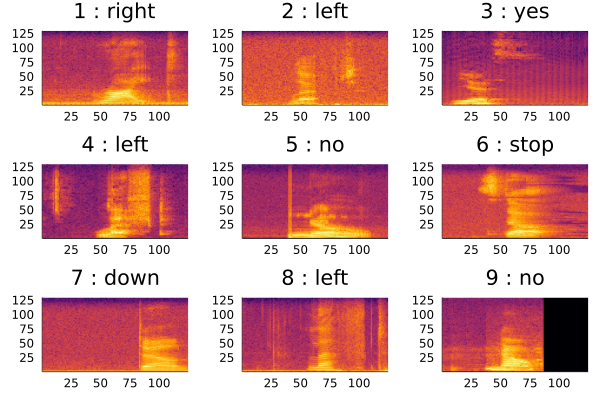

In [15]:
rows = 3
cols = 3
n = rows*cols

figs = [
    plot_spectrogram(spectrogram_ds[i][:,:,1,1],"$i : $(first(commands[spectrogram_id[i]]))")
    for i=1:n
]

plot(figs...,layout=(rows,cols))

In [16]:
for i=1:9
    # wavplay(train_wf_x[i],16000f0)
    inline_audioplayer(train_wf_x[i],16000f0)
end

<source src="data:audio/wav;base64,UklGRjz6AABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQD6AAAqARW8ZgEzvKwBVrzVgWq86AF0vOABcLy7gV28eAE8vFeBK7xTgSm8gAFAvK4BV7y5gVy87YF2vAVBgrwMwYW8/AF+vMwBZryqAVW8ZYEyvCOBEbyeAc+7SAGku/gBfLuYAUy7VAEqu6ABULoAAYC4YAGwubAB2LrQAei6eAG8ugQBArswARi7RAEiu/AB+LpwATi6UAGouigBFLs4AZy6EAGIuvABeLoAAYC6YAEwusABYLnAAeA5AAEAO9gBbDtsAbY7zgHnOwuBBTwJgQQ8+AH8O/wB/jsKAQU8BgEDPBwBDjwyARk8O4EdPE4BJzxUASo8WAEsPEuBJTxcAS48h4FDPKABUDy/gV88z4FnPN+BbzwAAYA8/YF+PAoBhTwVgYo8GgGNPC4BlzxAwZ88TAGmPGYBszxzgbk8eMG7PG1BtjxbQa08XUGuPFbBqjxiAbE8X0GvPFuBrTxlQbI8XAGuPGeBszxjQbE8VYGqPEuBpTw+AZ88Q0GhPD4BnzxKwaQ8S0GlPENBoTxBgaA8GgGNPPQBejytgVY8XgEvPA4BBzyqAdU7hgHDOz4BnzsSAYk7XAEuO/ABeDoQAYi6mAFMu3QBurv0Afq7NgEbvIOBQbykAVK8ygFlvAjBg7wnQZO8I4GRvC1Blrw2AZu8P0GfvFdBq7xtQba8a0G1vHdBu7yiAdG8vAHevMOB4by4Ady8u4HdvL9B37zCweC8zAHmvNwB7rz0Afq8zsHmvK+B17zXQeu80AHovMGB4LzDgeG8ysHkvN1B7rzFQeK8tgHbvLtB3bzEweG8wUHgvK7B1rywAdi8r4HXvLFB2LyoAdS8oAHQvKIB0byaAc28i0HFvIFBwLyQAci8nUHOvJoBzbyUwcm8l4HLvJWByryMAca8iMHDvHrBvLxhQbC8UAGovDgBnLwdQY68HYGOvA+Bh7zzgXm854FzvPYBe7zTgWm8nAFOvJeBS7xtgTa8PAEevBWBCrwJgQS8EgEJvNoB7buqAdW7VgGru4ABQLvoAfS64AHwuYABQLmAAcC5CAGEOrAB2Dp8AT47OgGdO8oB5TsXgQs8JgETPFwBLjyiAVE80YFoPPmBfDwJgYQ8CYGEPBjBizwpgZQ8MsGYPEABoDxaAa08e4G9PJ+BzzzDgeE810HrPNlB7DzPgec8xUHiPNFB6DzVgeo82UHsPPOB+TwNQQY9G4ENPRwhDj0joRE9IiERPR+hDz0gARA9GAEMPQ9hBz0DYQE9/4H/PPYB+zzkAfI81sHqPNNB6TzMweU8wMHfPLrB3DyiAdE8l4HLPI1Bxjx5Qbw8dMG5PFmBrDw6AZ08GUGMPPgBfDzvgXc8wgFhPK2BVjx0ATo8PAEePC4BFzz2Afs77gH3O+wB9jvCAeE7YAGwO+wBdjt8AT47sAHYOgABALjYAey6fAE+uxwBjrtEAaK7HAGOuwgBhLv4AXy7+AF8uwYBg7vcAW67EAGIu4IBwbvkAfK7D4EHvBABCLwgARC8GAEMvBABCLwBgQC8vgHfu+QB8rsBgQC8AAEAvCWBErxcAS68VAEqvHWBOrySAUm8kAFIvLwBXrzOAWe8u4FdvKeBU7yZgUy8kYFIvJ4BT7yHgUO8dYE6vH4BP7x+AT+8jYFGvIuBRbygAVC8qYFUvJoBTbyjgVG8qgFVvLGBWLyuAVe8qAFUvKGBULyiAVG8m4FNvLABWLzYAWy84YFwvOmBdLzpgXS88YF4vOOBcby8AV68jYFGvDoBHbwlgRK8CAEEvLYB27uEAcK7FgGLu9QBartAASC7gAHAuhABCLowARg60AFoOkgBJDvcAW47UAGoO9AB6DsMAQY8SYEkPHIBOTx7gT08Z4EzPFmBLDxuATc8cAE4PHQBOjx7gT08YYEwPFGBKDxIASQ8UAEoPG+BNzxoATQ8dgE7PIYBQzyIAUQ8nYFOPLmBXDy/gV88lAFKPHmBPDxkATI8NAEaPAeBAzzsAfY74AHwO9gB7DveAe87AAEAPBgBDDwxgRg8MAEYPAABADzIAeQ7cAG4O9gBbDtMASY7EAEIOgABALpgAbC5wAHgucABYLpgAbC6IAEQujABGLqgAdC5oAHQubgB3Lo0ARq7CgGFu1IBqbuEAcK7kgHJu3QBurtcAa67RgGju3ABuLt4Aby71AHqux+BD7xLgSW8TAEmvDYBG7wdgQ68tAHau14Br7teAa+7JgGTu2QBMrsQAQi7cAE4usABYLmAAcA5kAHIOuAB8DqYAcw6OAGcOqgB1DpAAaA5AAAAAJABSLqYAcy6sAHYumgBNLvYAWy7HgGPuwIBgbsKAYW7EgGJu+gBdLskAZK7QAGgu4ABwLvaAe277AH2uwwBBrwYAQy8JAESvCWBErwngRO8EYEIvPwB/rucAc67QgGhuzIBmbsoAZS7agG1u9gB7LspgRS8JYESvEIBIbxcAS68ZAEyvHYBO7xuATe8bYE2vBuBDbzuAfe7ygHlu1QBqrssAZa7fAE+u2wBNrtwATi7PAEeuywBFrsQAQi6IAEQOiABkDogARA74AFwO3oBvTu8Ad47HYEOPEuBJTwhgRA8L4EXPDYBGzw9gR48PAEePEuBJTyFgUI8ggFBPIuBRTyVgUo8qAFUPKeBUzyRgUg8g4FBPHgBPDx6AT08bgE3PHmBPDyEAUI8cgE5PF2BLjxIASQ8HgEPPBmBDDwMAQY80AHoO6AB0DtMAaY79AF6O8AB4DpAAaA5EAEIuogBRLtgAbC7pAHSu+gB9LsJgQS8DAEGvBIBCbwkARK8J4ETvCABELwhgRC8E4EJvBOBCbw+AR+8YAEwvGmBNLyFgUK8lYFKvLuBXbzDgWG81gFrvPeBe7ziAXG8uAFcvIgBRLxyATm8YYEwvGYBM7xrgTW8bYE2vF4BL7xXgSu8WAEsvEoBJbwiARG8ygHlu6gB1LtmAbO7JgGTuygBlLsgAZC7xAFiuxABCLvQAWi6gAHAOPABeDocAQ47LAEWO/gB/DqIAUQ7wAFgO3ABODsUAQo7IAEQOsABYLnAAeC5QAEguhABCDoAAQC4EAEIuoABQDkAAYA5MAGYOhQBCjtcAS47tAFaO7ABWDv8AX47BgGDO3QBOjt4ATw7VAEqO8gB5DoYAYw6AAEAudABaLqwAVi6aAG0uiABkLqAAUA6ZAEyOyIBkTt0Abo7wgHhO/wB/jsBgQA83gHvO74B3zvEAeI7AYEAPBOBCTwlgRI8ZAEyPJ+BTzzZgWw8EYGIPClBlDwzgZk8Q0GhPEzBpTxHgaM8SsGkPGDBrzxaAa08TYGmPEFBoDwtQZY8JUGSPBGBiDwQAYg8C0GFPALBgDwHgYM8DAGGPBwBjjwWAYs86YF0PNWBajyHgUM8N4EbPBwBDjy4Adw7rgHXO4YBwztCAaE7sAFYO2QBMjtoATQ7SAEkO0wBJjsoAZQ6UAEoOsABYLkMAQa7OgGduwGBALw8AR68bYE2vIwBRryWAUu8gYFAvIQBQryZgUy8m4FNvJ2BTrypgVS82AFsvPuBfbwIwYO8E0GJvBlBjLwYwYu8D0GHvAuBhbwOAYe8DgGHvAzBhbwOwYa8IUGQvDOBmbw9QZ68R0GjvEzBpbxGAaO8L0GXvA9Bh7wJQYS8BsGCvPGBeLziAXG8xgFjvKYBU7yJgUS8a4E1vEwBJrxBgSC8NgEbvDuBHbw/gR+8QgEhvF+BL7xwATi8n4FPvLuBXbyfgU+8j4FHvHWBOrwyARm8AYEAvJoBzbtkAbK7ggHBu3QBurvaAe27H4EPvCmBFLxUASq8bYE2vDuBHbwhgRC8DYEGvMYB47ukAdK7XAGuu2YBs7taAa27OAGcux4Bj7u4AVy7wAHgukgBpDpYA

<source src="data:audio/wav;base64,UklGRjz6AABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQD6AABQAai6kAHIO2uBNbw2AZu84gFxvGYBs7v0AXo7wYFgvOYBc7xoAbS6IAGQOzABmLvFgWK8wAFgvE4BJ7xoAbQ65gHzu4wBRrwAAYA6bAE2PGABMDt/gT88ggFBPDABmLvYAWw88AH4OvQBejvhgXA8cAE4OmIBMTz+AX88MsGYPG+BNzxbgS08eMG7PCABkDwIAQQ8CAGEO0gBJLtKAaU7RgGjPBTBiTyJgcQ85gFzPNgB7DokARI70AFoutOBaTwBQYA8j4FHPDTBmTwbgQ08gAFAOxmBDDxewa48pgHTPKGBUDz+Af87O4GdPCWBkjw/gR88EYGIPEwBpjwuAZc81AHqOwWBAjw2wZo8kAFIPAjBgzzKAWU8M4EZPN7B7jwNgQY9p4HTPGYBszwGAYM8g4HBPAbBgjwAAQA6EAGIOiABEDykAdI7wAFgObIB2Ts7gR08UAGouloBrbu3gVs83AHuO3QBOrsgAZC5X4EvPCgBlDtQASi7a4E1PAABgLr0AXq7GAGMuuQB8jvcAe47QAEguQdBg7zQwee89gH7u4QBQrx4ATy8LgGXu8GBYLwYAYy7AAGAulgBLLvAAWC58AH4OiABkDsvgRe85AHyu5oBzTsSAYk7rAFWO4gBxDuKAUU8iAFEPLWBWjwuAZc7cAG4OgQBgjvwAfg6kYFIPGgBNLtYAaw7tgHbOwABADtEAaI8G4GNPPIBeTxwATg6EAEIOieBEzyKAcU7pAFSOybBkjxNQaY8b4E3PFVBqjx4ATw89gF7PIIBwTsIAYS6qgFVPJAByDo+AZ873AHuO5wBTjsMAQY8aAE0PKOB0Tz2Afs83sHuPJIByTxVgSo894F7PAoBBTyAAUA6aMGzPAWBgjySAck76AF0PAYBgzw7QZ08Q4EhPBYBizwjQZE8bMG1PAABAD18AT47BAECPCVBkjwZgQw8TAGmOyABEDwUAYo7eAG8OkgBJDsZgYw8FAEKPdYBazzkAXI8JgGTPPuBfTxTQak8UgGpPAVBgjw7gR080gHpOw4BhzstgRY8ygHlO+AB8Dv2AXs8ZAGyO42BRjxzgTk8pAFSO8AB4DsoAZQ7CAEEPAABgDjAAWA7JAGSO1ABKLtvgTe8s4FZvAABADyAAcA4YAGwOlQBqjvMAea7AAGAuR4BD7wxgRi8KYEUPDQBGrs2ARu81AHqO+QBcju0Ado7LAEWu94B77taAS08IAEQPGoBNTx/gT88nYFOPPwBfjyoAdQ7HAEOu72BXrxTgam8HgGPu24Bt7sjQZG8OgGdO1oBrTzKweQ8wAHgPP2BfjyGAUM8CgGFO1YBq7vQAei65AFyu3wBPrzEAWI7sAFYuyYBE7wPgQc8mgHNO7QBWrs7gZ28m4FNvAABADoIAYS6pgHTOyIBETxgAbA6Z4EzvDgBnLsAAQA5KgGVO62BVjyOAcc78YF4PCABkLl6Ab277gF3PD4BHzxuATc8V4ErPLAB2LvqAfW7YAEwOsGBYLwtgRa8LAEWOwbBgry0AVq8H0GPvIeBQ7wVgQq8agE1vFABKDqUAcq7EgGJu7OBWbw2AZu7jAFGOxgBDLyKAUW8SsGkvAuBhbyKAcW77AF2O9ABaDugAVA7SAGkOrWBWrySAUm8GAGMvA2BhrxmAbO7YAGwO1oBLTzQAWi6aAG0O0QBIjwAAQA4xgHju7wBXruMAUY71gHrO3ABOLqQAci7DAEGO7QBWjvQAWg6jAHGOxgBDDwmARM8BYECPA9BhzxLQaU8o4FRPLgB3DwJQYQ8DYGGPGgBtDw5gRw8NAGaPGmBNDx4Abw6mAHMuhQBijspQZQ8XgGvO1ABKLoAAQA42AHsu9AB6DoxgRg8M4GZPGYBMzyIAcS6MgGZO/QBertxgTi8m4FNvIQBwrvAAWA6LgGXO9AB6DpuAbe7tAFaPAjBAz1lgbI8qAHUO3uBPTx8Ab48JsGSPEmBJDwjgRE8XAEuPLWBWjxAASA8EAEIOkwBprvSAem7K4EVvHgBvDvKweQ8ygHlOwYBg7sEAQI7JAESu54BzzsBgYA8+4F9PPGBeDyNgcY8N0GbPBuBDT0o4RM9wYHgPBwhDj0+AZ88oYFQPMAB4DzHgeM88AF4PPwBfjxHgSM8J4ETPN4BbzxUASo7LAEWPIbBwjwSAYk8e4E9PIbBwjxLYSU92YHsPPWBejyQAUg8ZMGxPGeBMzyMAcY7BAGCPEgBpDtHgSM8AYGAPCeBEzzMAeY7VAEqPJgBTDxPgSc88AF4OpgBzDu5gVw8AgEBPPYBezx6Ab07tAHaO+2BdjxBgSA84UHwPIoBxTyvgdc8x0HjPAABgDrgAfA6HYEOPGOBMTwKAYU7jAHGu9AB6LoAAYC5cAE4O02BJjx8Ab47fgG/O+4B9zsXgQs83gFvPHIBOTzUAWo8NYEaPG4BtztpQbQ8ngFPPKABUDuKAUU8f4G/POrB9DwoARQ8EgGJO+QBcjwZQYw8wgHhPCVBkjzSAek7sYFYPHWBOjyQAcg7PYEePKQB0jtwATg6ugHdOygBFDs7gR08I4ERPJYByzsiAZE7dgG7O9eBazzCAeE7LgEXPOAB8DtgAbA6AAAAABwBDjw/gR88BAECO9gB7DqgAVA7gAFAuxwBDrvOAec7E4EJvCgBlLoyARk8aAE0u6oB1TvvgXc8UgEpPMgB5LrEAWK75AFyuxYBi7xSAam7EgEJvCdBk7ysAda7PYEevJuBTbyYAcy7GAGMuugB9DtcAS48gAFAObgB3DucAU47JgGTOyjBkzyWAcs7gAHAu7QBWrzqAfW7gAHAugwBBrwsARa8YAGwuqYB0ztPgSe8AAGAvBGBCLwRgQi8mAHMujgBHLuAAcC7C0GFvFgBrLopgZQ8oAFQOuYB87sAAYC4aAG0OsgB5DowARg6YAGwO6oBVTzCAeE7ngHPOxOBCTwRgQg8CAGEOgIBgbvgAfC6ygHlOygBFDyoAVS7kAHIutgB7DokAZK7z4FnvOmBdLwAAQC5QAGgucAB4DqAAcA7oAFQu/wBfrsgAZA6G4ENPFABKLpdgS68OAGcugQBAjwuAZc7JAGSO17BrjxbQa081gFrPG+BNzxCAaE7GAEMO1wBLrwIAYS7aAG0O0ABILpIAaS6pAFSuyuBFbxmATO8rgHXu6ABULvgAXA6AgGBO3YBO7wSAYm8RAGiO9YB6zt4Abw6JYESPKAB0DrQAeg774F3PJgBzDr2Afs7TUGmPF2Brjy6Ad08cgG5PKoBVTwKwYQ8J0GTPNGBaDxLgSU8DgGHO3ABuDtNgaY86AH0OxwBDruCwcA8gAHAPOIB8TvwAXg68gF5PHoBvTwQAQi7W4EtPHjBuzwAAYA6fAG+O3oBPTxFgSI8SAGkPMWBYjw9gR480AFoPKAB0DkyAZk7M0GZPDVBmjzFgWI88AF4PNYB6zyHgcM89MH5PD+BnzwWAYs7/4F/PEWBIjwoARQ8PgGfO2YBMzwOAYc7uAFcO4+BRzwiAZE7lAHKOxABiDuPgUc8CsGEPPAB+DrQAeg7DAEGPCgBlDpKASU8TAGmOxwBjrtAAaA5JAESPOABcDvAAWA6EAGIOlgBrLo0AZq7EgGJu9YBazwaAY08NsGaPCrBlDxEwaE82YFsPE4Bp7ubgU08eAG8PHlBvDwtQZY8JYESPNOBaTxAAaA73AHuOwuBBTxoAbQ7YUGwPA+BBzzQAeg7HYEOPKYB07tlgTK8egG9u1wBLjwMAYY8d0G7PFwBrjwRgYg8gYFAPFYBqzv4Afw72gFtPGABsDn2Afu78AF4u3ABuLtRgSg8+AF8O1wBrjubgU08RYEiPMoB5TtkAbI7dAE6PDQBmjw6wZw81YFqPDIBmTwZg

<source src="data:audio/wav;base64,UklGRjz6AABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQD6AACwAVg6iAFEO5gBTDugAVC6eAE8uxYBi7smAZO7IAGQuyoBlbsQAYi7FgGLuwwBhrsQAYi76AF0u8ABYLuQAUi7YAEwu2QBMruUAUq7iAFEu3ABOLuEAUK7lAFKuxgBDLscAQ67NAEau/gB/LrYAey60AHouugB9Lr4Afy6+AH8uugB9LrYAey6mAHMunABuLpYAay6MAGYugABgLqwAVi6YAEwuhABCLoAAQC6wAHguUABoLkAAQA4QAGgOcAB4DngAfA5IAEQOmABMDrwAXg6CAGEOgABgDrgAXA68AF4OhgBjDpIAaQ6cAG4OogBxDqoAdQ62AHsOgQBAjsYAQw7LAEWOzABGDs0ARo7OAEcOzgBHDs0ARo7LAEWOyABEDsoARQ7LAEWOzgBHDtUASo7RAEiOxwBDjsIAQQ7wAHgOrgB3DrgAfA6uAHcOsAB4Dq4Adw60AHoOhQBCjtIASQ7VAEqO2ABMDs4ARw7KAEUO0ABIDvoAfQ6gAHAOgABgDqgAVA6YAEwOmABsDlgATA6sAFYOuABcDowARg64AHwORABCDqAAcA5YAGwOQAAAACAAcA4AAAAAEABILkAAAAAgAHAuAABADjAAWC5EAEIukABILogARC6UAEoukABILoQAQi64AHwucAB4LlAASC6AAEAuuAB8LmAAcC5gAHAuQABgLmgAdC54AHwucAB4LlAASC64AHwuQABgLpwATi6UAEoumABMLpQASi6sAFYukABILpwATi6cAE4uvABeLowARi64AHwucAB4LlAAaC5QAEguQABALkAAYA4AAEAucABYLmAAcA4cAE4OoABQDqgAVC6kAHIupABSLqYAcy6KgGVu3QBuruAAcA44AHwOpgBTDsEAYI77AF2OwwBhjvsAXY79AF6O8gBZDsKAYU77AF2OwABgDvwAXg7zAFmO9ABaDuUAUo7ZAEyO1QBKjtgATA7ZAEyO2wBNjtAASA7HAEOO1wBLjs0ARo7IAEQO+gB9DrIAeQ68AH4OvAB+DoEAQI74AHwOtAB6DrAAeA6eAG8OggBhDogAZA6EAGIOhABiDqwAVg6cAE4OuABcDqwAVg68AF4OuABcDqQAUg6oAFQOlABKDrgAfA5gAHAOQABgDiAAcC4wAHguYABQLqgAVC64AFwupABSLpwATi6oAFQuoABQLpgATC64AHwuSABkLmgAdC5QAEgurABWLqQAUi6UAEoukABILpwATi6UAEouoABQLogARC6AAEAusABYLkgAZC5gAFAujABGLpQASi6MAEYuigBlLpIAaS6WAGsujgBnLpYAay6eAG8umABsLqoAdS6mAHMuoABwLqYAcy6WAGsujgBnLpQAai6YAGwukABILowAZi6kAHIungBvLo4AZy6EAGIuggBhLrAAWC6OAGcuhABiLo4AZy6YAGwungBvLo4AZy6EAGIuuABcLrQAWi6cAE4usABYLrQAWi6CAGEuigBlLooAZS6KAGUulABqLpgAbC6cAG4uogBxLrQAei6yAHkusAB4LrQAei6wAHgurAB2LqgAdC64AHwupgBzLogAZC6MAGYuhgBjLqwAVi64AFwuggBhLpYAay6cAG4uggBhLowAZi68AF4uhABiLpQAai6GAGMujgBnLpoAbS6iAHEupgBzLrgAfC6+AH8uhABCLsYAYy6QAEgOQABALgAAYA4oAHQOkwBpjvQAWg7MAEYuuAB8LrQAWi7zAFmu9gBbLvoAXS77AF2u+ABcLvUAWq7wAFgu4gBRLt8AT67QAEguyQBErvwAfi60AHounABuLqAAcC6iAHEuuAB8Lo4AZy6MAEYutABaLqQAUi6oAFQukABILrAAeC5AAGAuaAB0LngAfC5AAEAOIABQDlgAbA5MAEYOsABYDoQAYg64AFwOsABYDrwAXg6CAGEOhABiDrAAWA6wAFgOigBlDoQAYg6kAFIOoABQDrwAXg6IAGQOigBlDoIAYQ60AFoOjgBnDqQAcg6iAHEOqAB0Dr4Afw6BAECO9gB7DqoAdQ6eAG8OmgBtDp4Abw6SAGkOsABYDoIAYQ6QAGgOgABgDrgAXA6CAGEOiABkDpQAag6WAGsOhABiDrQAWg6EAGIOuABcDpwATg6sAFYOgABgDoAAYA6QAGgOigBlDo4AZw6SAGkOvABeDrAAWA6YAGwORABCDoAAQA6EAEIOjABGDqAAUA6sAFYOggBhDrgAXA6QAGgOmABsDpoAbQ6kAHIOngBvDrQAeg6qAHUOrAB2DqIAcQ6gAHAOmgBtDp4Abw6eAG8OqAB0DqoAdQ6oAHQOnABuDpQAag6WAGsOhABiDrwAXg6wAFgOvABeDowAZg6GAGMOmABsDpgAbA6aAG0OmABsDpAAaA6UAGoOkgBpDrQAeg6qAHUOgwBBjvgAfA6eAG8OrAB2DqwAdg6iAHEOnABuDrQAWg6sAFYOigBlDooAZQ6YAGwOngBvDowAZg6EAGIOqAB0DqwAdg6mAHMOjABmDo4AZw6WAGsOqgB1DoYAYw6QAGguWABMLowARi6iAHEukYBo7siAZG7kAFIOpQBSjsOAYc7DgGHOwQBgjsSAYk7FgGLOw4BhzsSAYk7CAGEO9ABaDuwAVg7tAFaO5ABSDtsATY7eAE8O0wBJjs8AR47NAEaOxgBDDvAAeA6gAHAOsAB4DlAASA68AF4OhABiDooAZQ60AFoOqABUDqgAVA6gAFAOhABCDpAASA6AAEAOqAB0DngAfA5wAFgOQABgDhAAaC5oAHQuaAB0LngAfC5kAFIuggBhLoQAYi6GAGMusABYLoQAYi6SAGkupAByLrQAei60AHougwBBrskARK7XAEuu2ABMLtcAS67UAEou0gBJLtkATK7WAEsu1QBKrsoARS7LAEWu0ABILtYASy7cAE4u1ABKLtIASS7OAEcu1wBLrtsATa7XAEuuzwBHrsAAQC7BAECuwgBBLsoARS7NAEauywBFrscAQ67FAEKuxwBDrs0ARq7TAEmu1QBKrssARa7LAEWuxwBDrsYAQy7PAEeuzQBGrs4ARy7IAEQu0ABILswARi7VAEqu3QBOrtgATC7bAE2u4gBRLuoAVS7hAFCu6ABULuAAUC7gAFAu6QBUru0AVq7qAFUu4gBRLtoATS7KAEUuzgBHLtgATC7RAEiuxgBDLsMAQa78AH4uvgB/LocAQ67IAEQuwwBBrsoARS70AHouiABkLpwAbi64AHwunABuLrgAfC60AHouqgB1LrYAey6wAFguuABcLqgAVC6oAHQuUABoLkAAYC5IAEQuiABELqgAdC5AAGAOAABADlAASA6oAHQOcAB4DmAAUA6cAE4OuAB8DnAAeA5IAEQOoABwDkAAYA5uAHcOmQBMjsQAQg7TAEmOxwBjjsHgQM8bAG2O4gBxDoAAYC4gAHAuqAB0LqoAdS6uAHcuoABwLqYAcy6cAG4usABYLogARC6kAFIuhABiLpoAbS6GAGMunABOLpwATi64AHwuQABALkgAZC5gAHAuYABwDkgAZC5EAEIugAAAABAASC5wAFgOaAB0DmQAUg6KAGUOjABmDpwAbg6UAGoOvABeDpAAaA6MAGYOjABmDoIAYQ6wAFgOuABcDrQAWg6WAGsOnABuDpYAaw6eAG8OngBvDrgAfA6AAEAOwABADvwAfg6oAHQOvAB+DoIAQQ7IAEQOxgBDDsEAQI7FAEKOxgBDDtIASQ7WAEsO1gBLDtUASo7QAEgO1ABKDtQASg7XAEuOzwBHjsQAQg7+AH8OuAB8DoEAQI7BAECO/gB/DrIAeQ6qAHUOtAB6DrgAfA6EAEIOxABCDsAAQA7AAEAO+AB8DoUAQo7DAEGOwwBBjvwA

<source src="data:audio/wav;base64,UklGRjz6AABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQD6AAAAAQA4gAHAOAABgDgAAYA4gAHAuEABILkAAYC4AAGAuAABgDiAAUA5gAFAOQABgDgAAQA4AAEAOAABADgAAQC4AAEAOYABwDgAAQC5AAGAOAABgDiAAcC4AAGAOAABADgAAYC4AAEAuIABwLjAAWC5AAEAuQABALmAAcC4AAGAOAAAAAAAAYC4AAAAAAABALkAAQC5AAAAAAABALgAAQA5QAEgOYABwDiAAcA4AAGAOAABADgAAQA4AAGAOIABwDgAAQA5AAEAOQABADkAAQA5AAGAOAABgDgAAYA4AAGAOAABgDgAAYA4gAHAOAABALiAAcC4AAGAuIABwLgAAQC5AAGAuAABALiAAcC4AAEAuQABALlAASC5gAFAuQABgLgAAQA4AAEAOAABADgAAYA4gAHAOAABADgAAQA4AAGAOAABgDgAAYA4gAHAOEABIDlAASA5AAEAOYABQDkAAQA5AAGAOAABADmAAcA4AAGAuAABgLgAAAAAAAGAuAABgDgAAQA4gAHAuIABwLiAAUC5QAEguQABALkAAYC4gAFAuQABALmAAcC4QAEguYABwLiAAcC4gAHAuIABwLhAASC5gAHAuIABwLiAAcA4gAFAOYABQDnAAWA5gAFAOYABwDgAAQA5QAEgOYABwDiAAcA4AAEAOAABADgAAYA4AAEAOAABgDgAAYA4AAEAuAABALlAASC5gAFAuYABQLlAASC5gAHAuAABgLgAAQA4AAGAOAABALiAAcC4gAHAuAABgLgAAAAAAAGAOIABwDgAAQA4AAEAuAAAAAAAAYA4QAEgOUABIDkAAQA5gAHAOIABwDgAAQA5gAHAOAABADlAASA5AAEAOYABwDgAAQA4AAEAOAABgLgAAQC5AAEAuYABwLiAAcC4QAEguYABwLiAAcC4QAEguYABwLgAAAAAAAEAuAABALgAAQC4AAAAAAABALgAAQC4AAGAOIABwDhAASA5AAEAOQABADmAAcA4AAEAOAABADgAAYA4AAGAOAABADiAAcA4AAEAOYABwDhAASA5gAHAOAABgDiAAcA4AAEAOAAAAAAAAQC4AAGAuAABALgAAQC4AAEAuAABALgAAAAAAAAAAAABALkAAQC5AAEAuIABwLiAAcC4AAAAAAABgDgAAYA4AAGAOAAAAAAAAYC4AAEAuIABwLgAAQC4AAEAOYABwDgAAYA4AAEAOAABgLgAAQC4gAHAOAABgDgAAYA4AAGAOAABALhAASC5AAEAuQABALgAAQA4AAEAOAABgDgAAYA4AAGAuEABILnAAWC5AAEAuQABADiAAUA5QAEgOQABADkAAQA4gAHAuEABILkAAQC4AAEAOYABwDgAAQA4AAEAuIABwLiAAcC4AAGAuIABwDhAASA5AAEAOQABALhAASC5AAEAuYABQLkAAYC4gAFAOUABIDmAAcA4AAAAAAABALnAAWC5QAEguQAAAABAASA5QAEgOQABADgAAQA5gAHAOAABgLgAAQA4gAFAOYABwDgAAAAAgAHAOAABgDgAAQC4AAGAOAABADmAAcA4AAEAOQABALiAAcC4AAEAOAABgLgAAQC5AAEAOIABwDiAAcC4AAGAOAABADkAAYC4AAEAuIABQLmAAcC4AAAAACABkLkAAAAAgAHAOQABgLhAAaC5IAGQOSABkDkAAYC5AAGAuIABwDmAAcC4gAHAuYABwDlAAaA5wAFguQABADlgAbA5AAGAuAABgLkAAQA4gAHAOEABILkAAYC4QAEgOQABADhAASC5AAAAAEABILkAAQC4gAHAOEABILkAAQA4QAEgOQABgLgAAQC5gAHAOEABIDkAAQC5AAEAOIABQDkAAYC4AAEAuQABgDgAAQA5gAHAuAABgLgAAQA5AAAAAAABALgAAQC4AAEAOAABALgAAYC4gAHAOAAAAAAAAYA4AAEAOQABgLgAAQC4AAAAAAABADgAAYA4gAHAOAABADgAAAAAAAGAOAABADgAAQC4AAAAAIABwDgAAAAAAAEAuYABwDiAAcA4AAGAuIABwDgAAYA4AAGAuAAAAAAAAQC4AAEAuIABwLgAAYC4AAEAuAABgLgAAYC4AAAAAIABwLiAAcC4gAHAuIABwLgAAQC4AAAAAIABwDgAAYA4AAEAOAABgDgAAYC4AAAAAAABgDgAAYC4AAGAOAABADkAAAAAAAEAuAABgDgAAAAAAAGAuAABADkAAQA4AAGAuIABwLgAAYC4AAGAuAABALmAAcA4gAHAOAABADiAAcA4AAGAuAABgLiAAcC4AAEAuAABADgAAYA4AAGAOEABILkAAAAAAAGAOAABgDiAAcA4AAEAOAABADkAAQC4gAHAuAABgDgAAQA4AAEAOAABgDiAAcA4gAHAOAAAAAAAAYA4gAHAOAAAAAAAAYC4AAAAAAABALgAAQC4AAGAOAABgDiAAcA4AAGAOAABADgAAYA4AAAAAAABgLiAAcA4gAHAOAAAAACAAcA4AAEAuAAAAAAAAAAAAAEAuQABgDgAAQA4AAEAOAABADhAASC5AAGAuAABALgAAAAAAAGAOAABALgAAQC4gAHAuAABALgAAYC4AAAAAEABIDkAAYC4AAGAOAABADgAAQC5AAAAAAABgLgAAQA5AAGAOAABALlAASA5AAAAAAABgLiAAcA4AAGAOIABwDgAAQC4AAGAOAABADkAAYC4AAGAuAABADmAAcA4gAHAuIABwDgAAYA4AAGAuAABgDgAAQC4gAHAOAABADkAAQC5gAHAOAAAAAAAAQC4gAHAOIABwLjAAWA5gAFAuQABgLggAZA5wAFguYABwDgAAYA4AAGAOAABADiAAcC4AAEAuAABALgAAYA4gAHAuIABwDiAAcA4AAGAuAABADgAAQA4AAEAOYABQLkAAYC4wAFgOYABQLmAAcC4gAHAOIABwLiAAcC4AAEAuAABADmAAcA4gAHAuAABgDiAAcA4AAEAuAABgDgAAQA5AAAAAIABwLgAAAAAAAGAOAABADgAAAAAAAGAOAABgDiAAcC4AAGAuAAAAAAAAQA4gAHAOAABALgAAQA4AAGAOAABALgAAQA5AAEAOQABALgAAQA4AAGAOIABwLgAAQC5AAEAuAABADgAAYC4AAGAuAABADkAAAAAgAHAuAABADkAAAAAAAEAOAABADgAAYC4AAGAOAABALgAAYA4AAGAOAAAAAAAAQA4AAAAAAABALgAAQA4AAEAOAABALiAAcA4AAEAuIABwLgAAQC4AAAAAAABADiAAcC4gAHAOAAAAACAAcC4AAGAOAABgDgAAYC4AAEAuAABgDiAAcC4AAGAuAABALgAAQA4AAEAOIABwDgAAQA4AAGAuIABwDgAAAAAAAAAAAABADgAAQA4AAAAAAABADgAAYA4AAGAuAABALiAAcA4AAAAAIABwLgAAQA4AAEAOAABgLgAAYA4gAHAOAABADgAAQC4gAHAOAAAAAAAAQC5AAAAAAABgLgAAQA4AAGAOAABALgAAQA4AAEAuIABwLiAAcA4AAAAAAABgLiAAcA4AAGAOAABALlAASC5AAEAOEABIDlAASC5AAEAOMABYDkAAYC5AAAAAIABwDgAAYC4AAEAOAAAAAAAAYA4AAGAuAAAAABAASA5AAGAuAABALiAAcA4AAAAAAAAAAAAAYC4AAEAuQAAAACAAcA4AAEAOAABADgAAQC4AAEAuAABgDgAAAAAAAEAuAAAAAAAAAAAAAEAOQABALgAAQC4gAHAOAAAAACAAcA4AAEAuAABADgAAQA4QAEguQAAAAAAAAAAgAHAuAABADgAAAAAAAGAuAAAAAAAAQA4AAAAAAABALgAAAAAAAGAOIABwLiAA

<source src="data:audio/wav;base64,UklGRjz6AABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQD6AAAAAYA5YAGwOYABwDnAAeA54AHwOTABGDpgATA6IAEQOjABGDogARA6QAGgOaAB0DkAAQA6AAEAOhABCDrgAfA5IAEQOgABADoAAQA6QAEgOmABsDlAASA5gAFAOQABADlAAaA5gAHAOWABsDmgAdA5QAGgOcABYDmAAcA4AAEAOAABALgAAQC5gAHAuIABwLigAdC5wAHgucABYLkgAZC5EAEIulABKLpAASC6gAFAuqABULrQAWi6AAGAutABaLoAAYC68AF4ulABKLoAAQC64AHwuSABkLkAAQC5wAFguaAB0LkgAZC5QAGguQABALqAAcC5AAGAuUABILkAAQA5wAFgOQABgDhAAaA5AAGAOQABgDmAAcA5gAFAOQABADpAASA6wAHgOQABADoAAQA6oAHQOeAB8DkAAQA6YAGwOSABkDmgAdA5UAEoOmABMDpgATA6wAFgOgABADrAAeA54AHwOQABgDiAAUA5QAEgOQABALkAAQC5gAFAuUABILkAAQC5AAAAAAAAAACAAcC4AAGAuAABADgAAAAAAAEAuIABwDgAAQA4AAEAuAABgLgAAQC4gAHAuCABkLlAAaC5YAGwucAB4LkQAQi6EAEIusAB4LkAAQC5gAFAuWABsLmAAUC5AAGAuSABkLkAAYC5gAFAuQABALgAAQC4AAEAOIABQDlAASA5AAEAOAABgLgAAAAAAAGAOEABIDmAAUA5AAEAuAABADiAAcA4AAEAuAABgLiAAUC5gAHAuAABgDgAAYA5wAHgOcABYDkAAQA5YAGwOUABoDkAAQA5gAHAOAABgDkAAQA5AAEAuYABwDgAAYA4AAEAuQAAAAAAAYC5YAGwuYABQLkAAQC6AAEAusAB4LlAASC6QAEguhABCLpAAaC5QAEguQABgLgAAQA4AAGAOcABYDkAAQC4gAFAOYABQDkAAQA4AAGAOAAAAACAAcA4gAHAOMABYDlAAaA5AAGAuAABgLgAAAAAAAAAAAABADgAAAAAwAFgOcABYDkgAZA5gAHAOSABkDnAAeA5AAGAOUABoDnAAeA5wAHgOSABEDpgAbA5IAGQOYABwDlAAaA5AAEAOAABALmAAcA4gAFAOQABgDgAAAAAgAFAOQABADkAAQC4gAHAuEABILmAAUC5QAEgucABYLkAAQC64AHwucAB4LlwATi6MAEYuuAB8LngAfC5AAEAukABILoAAYC5AAAAAAAAAAAAAYA4AAEAuSABkLkAAAAAAAGAOAABALiAAcA4AAGAOAABADgAAQA4AAGAuIABQLkAAYC5AAEAOAABADgAAAAAAAEAOAAAAAAAAYA5AAGAOSABkDlgAbA5YAGwOeAB8DngAfA5IAEQOmABsDkAAQA5AAGAOYABQDkAAQA4AAEAuAAAAAAAAQA4gAFAOYABQDkAAYA4AAGAOAABgLgAAQC4AAEAuAABgLkAAYC5gAHAucAB4LmgAdC5gAHAuSABkLlgAbC5wAFguWABsLmAAcC5AAEAucABYLkgAZC5AAGAuYABwLgAAYC4wAFguUABILnAAWC5gAFAuQABADgAAQC4gAFAOcAB4DkQAQg6EAEIOoABwDkwARg6QAEgOgABADrgAfA5QAGgOYABQDkAAYA4gAHAOAAAAAAAAAAAAAAAAGABsLlAASC5gAHAOAABgDgAAQA4AAGAOGABsDnAAWA5gAHAOAABgDkAAAAAwAFguQABALgAAQC4QAEguQABADgAAYC4IAGQuYABQLlAASC5wAFguUABILkAAQC5gAFAuYABwLgAAAAAgAHAuIABwLgAAQC5IAGQuYABQLlAASC5gAFAuYABwLgAAYA4AAGAuEABILkAAQA5AAGAuMABYLkAAAAAAAEAuEABILkAAYC5gAHAuIABwDgAAQA5QAEgOUABIDmAAUA5gAHAOSABkDmAAcA4AAGAOcABYDlAASA5AAEAuAABgLkAAQC4AAAAAAABgDlAAaA5wAFgOQABgDkAAYA5wAHgOQABADpAASA6EAEIOkABoDmAAcA4QAEguQABgLmAAcC4AAEAOIABQLkAAQC5AAGAuYABwLmAAcC5AAEAusABYLlAAaC54AHwuYABwLkAAQC64AHwueAB8LlgAbC5AAGAuQABgLkgAZC5IAEQumABsLmAAUC5IAGQuUABoLnAAWC5AAEAuYABwLgAAYA4gAHAOAABgDlAAaA5gAHAOaAB0DkAAYA54AHwOSABEDowARg6EAEIOgABADowARg6gAHAOWABsDlQASg6QAEgOoABwDmAAcA5oAHQOYABQDmAAcC4wAFguSABkLkgAZC5wAFguUABILkAAAAAAAAAAAAAAAAAAQC4gAFAucABYLnAAWC5QAGguUABoLkAAYC5wAFguUABILlAASC5gAHAuAABALiAAUC5wAFguQAAAAAAAQC4gAHAuEABIDlAASA5AAGAuAABALmAAcC4AAAAAAABALgAAYC4AAGAuAABgLnAAWC5AAEAuYABQLlgAbC54AHwuaAB0LlAASC5AAAAAIABwDhAAaA5AAEAOuAB8DmAAcA5YAGwOQABgDnAAWA5gAHAOAABgDiAAUA5AAEAOMABYDkAAYA4AAGAuAABgDgAAYC5QAEguUABILkgAZC5gAHAuAAAAACAAcA4IAGQOcABYDmAAcA4oAHQOQABADoAAQA6IAEQOuAB8DlwATg6MAEYOiABkDmAAUA5AAEAOIABwLhAASC5AAGAOAAAAAAAAAAAQAGgOYABQDlAASA5AAGAOIABwLiAAcC4wAFguaAB0LkgARC6UAEouiABELowARi6kAFIumABMLowARi6kAFIusABYLqAAUC6YAEwumABMLqgAVC6QAEgusAB4LngAfC5wAHguSABkLlAASC5AAGAuAAAAAAAAAAAIAGQOTABGDpAASA64AHwOXABODpgATA6YAEwOtABaDqwAVg60AFoOoABQDqwAVg6cAE4OjABGDpQASg6AAEAOsAB4DkgAZA5oAHQOQAAAABAAaC5wAFguRABCLpAASC6UAEoujABGLpAAaC5QAGguQABALqAAcC5AAEAucABYLlAASC5AAAAAAABADkAAAAAgAHAuQABgLmAAUC5IAGQuQABgLkAAYC5AAEAuEABIDngAfA5MAEYOgABADrAAeA5oAHQOaAB0DkAAQA5wAFgOUABoDmAAUA5AAGAOAAAAAAAAQA5AAEAOAABgDhAASC5QAGguYABwLhAASC5gAHAuAABADkAAQA4QAEgOYABQDmAAcA4wAFgOYABwDhgAbA54AHwOYABwDmgAdA5AAGAOIABQLlAASC5wAFguSABkLkAAYC5IAGQuSABkLmAAUC5gAHAueAB8LlgAbC5IAEQukABoLkAAYC4AAGAuQABgLhAASC54AHwuaAB0LlAAaC5QAGguYABQLkAAAAAgAHAOAABADgAAYA4QAEgOYABwDiAAcC4QAEguQAAAACAAUC5IAGQuQABADkAAQA5wAFgOaAB0DlgAbA54AHwOWABsDmAAcA4gAFAOcABYDkAAYA4AAAAAAABgDiAAUA5gAFAOUABIDkAAYA4AAAAAAAAAAAAAQA4AAEAOQABgDgAAAAAAAAAAAABALgAAAAAQAEgOcABYDkAAQA4wAFgucABYLlAAaC5gAHAuYABwLkQAQi6wAHgueAB8LlgATC6wAHguYABQLkAAQC5QAEguUABILkAAAAAAAEAuAABALiAAcA4wAFgOUABoDkgAZA5IAGQOUABoDnAAeA5wAHgOcAB4DlgAbA5gAFAOSABkDkAAQA5gAHAOIABQDkAAAAAgAHAOEABIDmAAcA4AAEAOQABgDlAAaA5gAFAOQABgDkAA

<source src="data:audio/wav;base64,UklGRjz6AABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQD6AAAAAQC4AAEAuoABQDngAXA6SAGkOsABYDpwATg6QAGgOrABWDpAASA6oAHQOWABsDmAAcC4gAHAufABeLqwAdi6wAFgOdABaDoAAYA4QAEgucABYLkAAQC5YAGwufABeDqoAdQ64AHwOQABALmAAcC5IAGQuTABGLqAAUC5sAFYOmABMDoAAYC5SAGkugABADjgAfA5IAEQugABALhgAbC5YAGwuVABqLp4ATy70AHouiABkLqYAcy6wAHguhABiLoAAQC6sAFYuiABELpQASi64AHwORgBjDoAAYA5kAFIOnABOLo4AZy6YAGwuSABELssARa7EAEIusABYLkAAQA4AAGAuAABgLgAAQA6IAGQOaABUDpQASg6AAAAADABmDqIAcQ6oAFQOjABGDpIAaQ6AAGAOkABoDkoAZQ6YAEwOkABILkAAYA5IAEQOsAB4DngAfC5YAEwuiABkDngAfA5AAGAOrAB2Dq4Adw6YAEwO+AB8DqgAVA6oAHQOWABsLnwAfg6eAG8OgABALmAAUA6AAEAOKAB0DlgATA6AAEAOWABsLkYAYy6kAFIuiABELoQAQi6IAGQuQABgLjAAWC5gAHAuIABQDkAAQC54AHwudABaLoQAYi6UAEouuAB8LlgAbC5AAGAOYABQDmgAdC5UAEoukABILrAAeA5IAGQORgBjLpgAbC5AAGAuCABkLqAAcC5gAHAORgBjLpYAay64AFwujgBnLoAAQC5gAHAuSABkLogARC6WAGsuhABiLoQAQi6YAGwuSABkDowARg6AAEAuWABsLlQASi6gAFAOQAAAAA4AZy6gAHAufABeDqAAcA4IAEQOiABkDoAAYA4AAAAAIABwDmgAVA6MAEYOkABoDkoAZQ60AFoOkABILlwATg6UAEoOmABMLoQAQg6IAGQOgABALlgAbC6MAEYusABYDqwAVi6MAEYusABYDoAAAAAIAEQOgABALlAASC6wAHgufABeLpgATA6gAHAOAABgLlwATg6AAEAOHABODoAAYA5EAEIusAB4DmAAcA5UAEougAAAABwATg6oAHQuUABoLlAAaC5EAEIuuAB8LkYAYy6gAHAuSABELoQAQi6YAEwOiABELrAAeC5QAEgOmABsLkAAYA5oAHQOYABwLggARA6oAFQulABKLqwAVg64AHwOYABwDngAfC5YAGwuYABQDlAASC5wAHgueAB8LkAAYA4EAEIugABgLjAAWA5YAGwudABaDrgAfA5YAGwOeABcDoAAYA4sAFYOsABYDrAAeA5QAEgOoABwDhAAaA6CAGEOpABSLqAAUC5AAGAuAABgLmQAUg6gAHAOBABCLoQAQg6QAEgORABCLogAZA5QAEgufABeLoAAQC5AAGAuUABILkgAZC5QAGgukABoLkwARi6AAEAuWABMDoAAYC4sAFYOsABYDowARg6oAHQOQABADpwATg6AAEAOAABADnAAeC5cAE4umABMLooAZQ6qAHUOjABmLogAZC6QAEgOYABwDpwATg64AFwuoABQLocAQ67qAHUumgBtLoUAQq7QAGgOYABQDrAAWA5QAGgORABCLoAAQC5QAEguWABsLkAAYC4AAEAuHABODogAZA5AAEAuYABwLhgAbC5EAGIOnABODrgAfC5AAGAOAABADgAAYA4AAEAOAABALhAASA5AAEAuqAB0LmAAcC4YAGwueAB8Dl4Abw6cAG4OoABwDkAAQA4gAFAuSABkLoAAYC60AFouoABwDiwAVg6IAEQuoABQLqAAUC5AAEAuAABgDiAAUA5gAHAOQABgDiAAUC5AAGAOCABEDpAASC5AAGAunABOLrAAWC6QAGgunABuLoQAQi6AAAAAKABULqgAVC6IAGQuYABwDggAZC5AAEAuoABQLlAAaC5QAEgOYABwLkgARC6AAGAOCABELowAZg6sAFYOlABKLpoAbQ68AF4OiABkDqoAdQ6AAEAOQABgDgAAQC5IAEQOpABSDoYAYy6GAGMugABgDjgAXA6+AH8OhABiDpgATA6GAGMOkABIDoYAYw6OAGcOggBhDqgAdA5gAHAuAABgLigAdC5CAGEOmABsDlQASi6cAG4OoABQDrgAfA5gAFAOhABCLqgAdA54AHwOQABALkAAYC4AAEAOHABODpQASg64AHwOQABADkAAQA60AFoOmABMLo4AZy6sAFYujgBnLpwATi6gAFAOWABsLp0ATq7eAG8ulABqLoIAYS6EAGIOsAB4DngAfC5AAAAAIABQLqAAcC5oAHQOZABSDrAAWA6wAHguSABkLkAAYA4AAEAOUABIDrAAWA5AAEAucABYLngAXA6wAHgOpABSDpgAbC5AAGAuAABALiYAcy6UAGounABOLpAASC6AAAAAIABwLnAAeA5eAG8OqABUDpAASC5QAEguTABGDoAAQA6oAFQOrAB2DpgATA6wAFgucABYLlAASA54AHwOUABoLoAAQC74AFwusAB4LlwATi6gAFAuoABwDgAAQC6wAFgugABgLgAAQA5MAGYOogBxDqAAcA5wAHgOTABGDoAAYA5AAGAOmABsDqwAVg6OAGcOtABaDpgAbC5AAEAuAAAAAAgARC6IAGQuUABILqwAVi6gAHAuSABkDlgAbA5AAEAuTABGLpAASA5IAGQOiABkLkAAQC6gAHAORABCLogAZC6MAEYugABALlgATA60AFoOkABILo4AZy6IAGQuiABkLkAAYA4gAHAuUABoDkAAYC6mAHMukABIDkAAYA50AFoupABSLrgAfC5oAHQuQABgLhgAbC5IAEQutABaLqQAUi6gAFAuYABwDkYAYw6sAHYOuAB8DqgAVA6wAFgOQABADkwARi6gAFAOYABwDiIAcS6IAEQutABaDrAAeA5AAEAOKAB0LngAfA5AAGAOgABgDmwAVg6oAHQOYABwDlAAaA6gAFAOigBlDpgAbA6AAEAOkABIDngAXA60AFoOjABmLogAZC6gAHAOCABELqAAcC5AAEAOIABQDnAAWA6iAHEOoABwDpgATA6AAEAuhgBjLpAASA5QAEgOaABULogAZA5AAGAOAgBhLrgAfC5IAGQuUABoLkgAZC5AAEAOQABADkAAQC5oAHQOQABADmAAcC5EAGIujABmLqAAUC6QAGguUABoLlgATC6IAEQuiABkLrAAeC5wAFgOcABYLlAASA5wAFguWABMLoAAQA5AAEAOXABOLoQAYi6aAG0usAB4LnAAWA5AAGAONABaDqgAdC5WAGsuuAB8LlAASC6gAFAOUABIDkgAZC5iAHEOiABkDqAAcC4IAEQOgABgDmAAcA5wAHgOYABwDjAAeA5AAEAuSABkLlwATi6gAFAuVABKDpQASi6gAHAuAABALgIAYS6gAFAuQABgLhgAbC5AAGAuCABkDlgAbA5AAEAuKAB0LkAAQA4YAEwOmABMDrwAXg6UAEoOiABkDkwARi6sAFYuiABEDoAAYC5wAFguXABODrAAWA5AAAAAJABSLqAAUA5AAGAONABaLqAAUA6QAGguXABOLoQAYg6UAEoOgABgDgAAQC6IAEQuoABwDgAAQA60AFoOkABIDkoAZS6oAFQugABALoIAYS6AAAAAIABwLiQAUi6AAGAuBABCLpgAbC5wAHgOQABADpAAaA5AAAAAEABIDkAAQA60AFoOiABkDmgAVA6AAGAOoABwDhgATA6AAEAOAABALlQASg6QAEgOmABsDlAAaC5gAFAOeAB8DlgAbC50AFougABgDhwATg6AAEAuCABEDoAAQA6QAGgOaABUDoQAQg6UAEoOgABgDmAAcA5GAGMOlABKDoAAYC5QAGguQABADkAAAAAkAFIurAB2LoAA

<source src="data:audio/wav;base64,UklGRjz6AABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQD6AACDgUE8fgE/PIABQDyAAUA8f4E/PIABQDyAAUA8fYE+PJQBSjyngVM8h4FDPH4BPzx+AT88k4FJPKgBVDyFgUI8kgFJPLgBXDzEAWI8q4FVPJWBSjzUAWo8uYFcPJGBSDy7gV08wAFgPMIBYTypgVQ8nAFOPJ+BTzy0AVo8x4FjPKYBUzyxgVg8xYFiPL+BXzyqAVU8r4FXPMoBZTymAVM8nAFOPKYBUzyEAUI8l4FLPI+BRzx2ATs8nAFOPIwBRjx6AT08g4FBPH2BPjyBgUA8f4E/PH4BPzySAUk8qAFUPIeBQzx6AT08mgFNPImBRDyUAUo8kAFIPHgBPDyEAUI8f4E/PH+BPzyAAUA8f4E/PIABQDx/gT88gAFAPIABQDx/gT88gYFAPH4BPzyBgUA8gAFAPHwBPjyZgUw8jYFGPHoBPTyCAUE8fgE/PIGBQDx/gT88gAFAPHuBPTyWAUs8pYFSPIeBQzyRgUg8pgFTPJ+BTzyJgUQ8kYFIPKOBUTyjgVE8hgFDPJOBSTyoAVQ8hYFCPJYBSzyOAUc8fgE/PGoBNTxtgTY8ngFPPIuBRTx/gT88agE1PG+BNzyIAUQ8fAE+PIOBQTx+AT88gYFAPH+BPzx+AT88hgFDPGYBMzxzgTk8hAFCPH4BPzyAAUA8gAFAPIABQDx8AT48m4FNPHmBPDxSASk8fYE+PH+BPzyAAUA8gAFAPH2BPjyVgUo8o4FRPKGBUDyHgUM8pAFSPM4BZzylgVI8m4FNPL2BXjyWAUs8eAE8PIOBQTx9gT48f4E/PH+BPzx/gT88gAFAPIGBQDx9gT48lAFKPKeBUzyEAUI8lAFKPKQBUjydgU48ogFRPJuBTTy5gVw8rYFWPJoBTTymAVM8iYFEPHuBPTyDgUE8fYE+PIGBQDyBgUA8aAE0PHIBOTyGAUM8fYE+PIGBQDyDgUE8Z4EzPGABMDxdgS48c4E5PIwBRjxKASU8Z4EzPImBRDx3gTs8m4FNPIwBRjx+AT88aAE0PHIBOTyBgUA8k4FJPKmBVDxwATg8cAE4PHABODxsATY8iAFEPH+BPzxqATU8XgEvPFwBLjx1gTo8hYFCPGWBMjx1gTo8b4E3PGoBNTyPgUc8YAEwPHOBOTybgU08h4FDPJeBSzx3gTs8bYE2PHOBOTxZgSw8X4EvPHmBPDxtgTY8V4ErPHuBPTxqATU8b4E3PIeBQzx6AT08hgFDPGYBMzxxgTg8iYFEPGWBMjxfgS88X4EvPGGBMDxfgS88YAEwPGQBMjxHgSM8UgEpPGQBMjxwATg8igFFPGYBMzxaAS08egE9PGgBNDxwATg8hgFDPH2BPjyAAUA8gAFAPH4BPzyBgUA8fgE/PIGBQDx/gT88fAE+PJgBTDyOAUc8eAE8PIeBQzxpgTQ8WYEsPHmBPDyBgUA8gAFAPH+BPzyBgUA8gAFAPH2BPjyZgUw8jgFHPHoBPTyDgUE8fgE/PIGBQDx/gT88gYFAPH+BPzyAAUA8gYFAPH2BPjyZgUw8jYFGPHoBPTyCAUE8fgE/PIABQDyAAUA8gYFAPGwBNjxZgSw8ZgEzPFuBLTxgATA8dgE7PG2BNjxxgTg8cAE4PHABODxwATg8cAE4PG4BNzxvgTc8g4FBPJYBSzyOAUc8d4E7PJWBSjyoAVQ8h4FDPH+BPzyAAUA8e4E9PJoBTTyLgUU8jAFGPL+BXzyqAVU8m4FNPKIBUTycAU48o4FRPJuBTTyjgVE8ngFPPKABUDykAVI8hAFCPKmBVDy3gVs8ggFBPH2BPjyXgUs8ogFRPKGBUDyeAU88oYFQPKGBUDyIAUQ8k4FJPJGBSDx4ATw8g4FBPIIBQTxmATM8c4E5PIWBQjx6AT08mAFMPJABSDx1gTo8mgFNPKABUDyfgU88pYFSPIWBQjyVgUo8kAFIPHWBOjycAU48jYFGPHYBOzycAU48jYFGPHQBOjyeAU88iYFEPHoBPTyZgUw8i4FFPJIBSTyOAUc8kYFIPJGBSDx8AT48agE1PHIBOTyFgUI8fAE+PIQBQjxngTM8cYE4PIYBQzx5gTw8hgFDPGWBMjxyATk8h4FDPHgBPDyZgUw8jgFHPHgBPDyFgUI8egE9PJYBSzy6AV08rAFWPJ+BTzyJgUQ8kAFIPKYBUzyfgU88jgFHPGeBMzxaAS08eAE8PIGBQDx+AT88k4FJPKeBUzyaAU08oYFQPKOBUTyFgUI8mgFNPHWBOjxrgTU8ngFPPIwBRjx6AT08gAFAPJgBTDyJgUQ8pgFTPLeBWzyDgUE8a4E1PFuBLTx1gTo8hYFCPHwBPjyCAUE8gAFAPGwBNjxZgSw8dgE7PIeBQzxlgTI8cYE4PJmBTDyjgVE8nAFOPKGBUDyiAVE8iAFEPJIBSTySAUk8d4E7PIQBQjyQAUg8pYFSPKGBUDyFgUI8qgFVPLIBWTyaAU08ngFPPLYBWzywAVg8g4FBPJOBSTymAVM8nYFOPKABUDy1gVo8xAFiPL2BXjzAAWA8v4FfPMABYDzBgWA8rgFXPIQBQjyPgUc8vgFfPKoBVTydgU48ogFRPJ2BTjykAVI8h4FDPJABSDymAVM8nAFOPKQBUjyLgUU8eAE8PJmBTDyhgVA8n4FPPKGBUDydgU48ugFdPK+BVzyYAUw8p4FTPIeBQzx8AT48hAFCPHeBOzycAU48igFFPH4BPzyFgUI8ZYEyPHmBPDxVgSo8YgExPIwBRjx7gT08ggFBPH+BPzyDgUE8aYE0PHGBODyEAUI8gAFAPG4BNzxWASs8fAE+PGmBNDxuATc8jgFHPE4BJzxOASc8e4E9PIOBQTxqATU8WgEtPHYBOzyCAUE8fgE/PH4BPzyYAUw8jgFHPHeBOzyXgUs8p4FTPImBRDx7gT08lYFKPKOBUTyfgU88nAFOPLoBXTytgVY8mAFMPLoBXTysAVY8nAFOPIuBRTyQAUg8pgFTPJ4BTzyhgVA8n4FPPJ+BTzygAVA8oAFQPJ+BTzygAVA8ngFPPKGBUDyeAU88ngFPPKWBUjyEAUI8mAFMPIwBRjx6AT08hgFDPGIBMTyNgUY8fYE+PGWBMjyMAUY8eAE8PIIBQTyEAUI8ZYEyPHQBOjyEAUI8f4E/PH+BPzySAUk8u4FdPK2BVjyWAUs8u4FdPK4BVzyEAUI8gYFAPHuBPTyZgUw8kgFJPGIBMTx2ATs8ggFBPIGBQDxpgTQ8a4E1PKABUDyIAUQ8kAFIPK2BVjyBgUA8lgFLPKQBUjyZgUw8u4FdPJgBTDx0ATo8l4FLPLoBXTypgVQ8r4FXPMuBZTyTgUk8dYE6PJuBTTygAVA8n4FPPKQBUjyGAUM8k4FJPKYBUzyZgUw8uYFcPLABWDyDgUE8gAFAPH+BPzx9gT48lAFKPKYBUzyKAUU8d4E7PJuBTTyNgUY8eAE8PJmBTDygAVA8o4FRPIeBQzyQAUg8q4FVPIGBQDyYAUw8jYFGPHYBOzycAU48iAFEPJIBSTyiAVE8tYFaPLABWDyWAUs8t4FbPMOBYTzAAWA8rYFWPJuBTTygAVA8s4FZPMeBYzyoAVQ8m4FNPKYBUzyHgUM8fgE/PIABQDx8AT48m4FNPIoBRTyPgUc8qAFUPJmBTDymAVM8iYFEPHmBPDyaAU08i4FFPI+BRzyoAVQ8nAFOPJ4BTzy5gVw8q4FVPJ4BTzyLgUU8fAE+PIIBQTx8AT48mAFMPI+BRzx5gTw8g4FBPH2BPjyBgUA8gAFAPH2BPjyEAUI8Z4EzPFwBLjxiATE8XAEuPGgBNDxBgSA8aAE0PI4BRzxJgSQ8agE1PHGBODxrgTU8igFFPHoBPTyDgUE8gAFAPH4BPzyCAUE8fYE+PIIBQTx9g

<source src="data:audio/wav;base64,UklGRjz6AABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQD6AABtgbY8fsG+PHQBujxswbU8csG4PH2BvjyUAco8k4HJPIIBwTywAdg8pAHSPLAB2DyqwdQ8t0HbPMTB4Ty3Qds8yUHkPJdByzyUwck8g4HBPIlBxDybQc08jgHHPJdByzyTQck8fAG+PINBwTyRgcg8jUHGPJIByTyrQdU8t0HbPK2B1jygAdA8qsHUPLjB2zy5gdw8u0HdPMjB4zzDgeE8zUHmPMNB4Ty9Qd482YHsPMTB4TzNQeY8uUHcPLTB2TzUAeo8xMHhPLoB3TzEweE8wMHfPMDB3zzIweM8xgHjPNDB5zztQfY86gH1PNoB7TzkAfI850HzPPNB+TztQfY84gHxPPdB+zwCIQE9/YH+PAOBAT0BgQA9/MH9PBLBCD0LoQU9CCEEPQTBAT0EAQI9C0EFPfmB/DwKwQQ9B0EDPQIhAT0JoQQ9BMEBPQ1hBj0SwQg9FsEKPR1hDj0Y4Qs9IOEPPSYBEz0iwRA9LCEWPStBFT0k4RE9J6ETPSNBET0kIRI9KCEUPSGBED0iIRE9H6EPPR9hDz0eAQ89GYEMPRzhDT0jYRE9K4EVPSwhFj0swRU9LAEWPTGBGD0wIRg9O2EdPTzBHT03gRs9OOEbPTlhHD0+wR49NsEaPTmBHD03oRs9MAEYPSwhFj0wwRc9MWEYPTFBGD03YRs9N0EbPTmBHD0+wR49QiEhPUtBJT1FYSI9RaEiPUrhJD1MASY9UAEoPU+BJz1TYSk9TYEmPUuhJT1OASc9TYEmPVDhJz1UASo9T6EnPVThKT1VgSo9VgErPVdBKz1VYSo9YuEwPV4hLz1dQS49YUEwPWLhMD1lQTI9YsEwPWghND1s4TU9asE0PW7hNj1uATc9bCE2PW7BNj1tQTY9aYE0PWVBMj1qwTQ9bWE2PWoBNT1tgTY9Z6EzPWbhMj1qATU9cuE4PXLhOD13QTs9egE9PW1BNj15QTw9gOE/PXoBPT1+4T49f0E/PXjBOz14wTs9e0E9PXLBOD1zoTk9fUE+PYIhQT17gT09gUFAPYjBQz18IT49hiFDPYohRT2DgUE9h2FDPYbBQj2HYUM9hOFBPYLBQD2GIUM9gOE/PYDhPz19QT49gYFAPYdBQz2BYUA9h4FDPYdBQz2HoUM9h2FDPYYBQz2KIUU9jMFFPY+hRz2RQUg9jYFGPY4BRz2Q4Uc9jAFGPZOBST2PQUc9i2FFPYwBRj2M4UU9jUFGPYWhQj2GwUI9hMFBPYbBQj2MAUY9jUFGPYwBRj2IwUM9iUFEPYzBRT2QwUc9kCFIPYlhRD2LgUU9jMFFPYwhRj2QAUg9kOFHPY4hRz2S4Ug9lCFKPZDhRz2PQUc9j4FHPZLhSD2NYUY9jOFFPYzhRT2KAUU9iYFEPYYBQz2KAUU9iCFEPYrBRD2NQUY9juFGPY+hRz2TYUk9ksFIPY+hRz2RgUg9i4FFPZABSD2Q4Uc9i6FFPY1BRj2GIUM9iOFDPYlBRD2HQUM9giFBPX+BPz2AIUA9guFAPYOBQT2AIUA9hOFBPYzBRT2K4UQ9h4FDPYWBQj2GwUI9h6FDPYNBQT2EwUE9hWFCPYThQT2DgUE9giFBPYFhQD2BgUA9gAFAPYDhPz2CwUA9gWFAPYLhQD2AIUA9hOFBPYWhQj2GAUM9hsFCPYVBQj2FgUI9guFAPYLhQD2BYUA9faE+PXuhPT16wTw9dCE6PXQBOj13gTs9esE8PXQBOj12ATs9eME7PXGhOD1vYTc9bgE3PXNBOT12wTo9c4E5PXFhOD1xgTg9bAE2PWohNT1u4TY9baE2PWwBNj1sATY9bWE2PWwhNj1mwTI9Z0EzPWmBND1mITM9aaE0PWthNT1roTU9bYE2PWwBNj1o4TM9aUE0PWwhNj1kITI9Z2EzPWmBND1gITA9ZAEyPWNhMT1foS89YWEwPVrhLD1a4Sw9XuEuPVtBLT1bYS09WuEsPVrBLD1VgSo9VsEqPV1BLj1Y4Ss9VYEqPVjBKz1a4Sw9WUEsPVghLD1ZoSw9WaEsPVlBLD1YwSs9XCEuPV2BLj1XYSs9VCEqPVOBKT1O4SY9TMElPUzBJT1NYSY9TaEmPUuBJT1MwSU9SYEkPUlhJD1KISU9RgEjPUuBJT1JQSQ9SaEkPU2BJj1HQSM9Q6EhPUIBIT1FgSI9RUEiPUWhIj1C4SA9QsEgPUNhIT1BgSA9QuEgPUIhIT1GwSI9QgEhPUNhIT0/QR89PWEePT1hHj06AR09PaEePTuBHT064Rw9NaEaPTeBGz03YRs9NMEZPTWBGj01gRo9PMEdPTwBHj03oRs9M2EZPTFBGD0vYRc9L6EXPTLhGD0zYRk9N4EbPTOBGT0vgRc9L2EXPSghFD0o4RM9LgEXPSwhFj0qARU9KYEUPSQhEj0k4RE9JWESPSTBET0iwRA9I2ERPSbBEj0mIRM9JAESPR+BDz0awQw9GAEMPRohDT0XoQs9FsEKPRNBCT0QIQg9EsEIPQ7hBj0OAQc9DsEGPQohBT0I4QM9BYECPQdhAz0IwQM9B0EDPQWBAj0DQQE9ACEAPQNBAT0DgQE9AaEAPf1B/jz4wfs89sH6PO9B9zzvgfc88AH4POmB9DzlQfI86sH0POoB9TzlgfI83sHuPNdB6zzNgeY8y0HlPMYB4zzCAeE8wUHgPLoB3Ty/Qd88t4HbPK2B1jymAdM8qsHUPK4B1zymAdM8rAHWPK1B1jyngdM8o0HRPKAB0DyZgcw8lAHKPJzBzTydQc48j0HHPIwBxjyKAcU8g4HBPHtBvTxuAbc8c0G5PG4BtzxrQbU8a0G1PGdBszxlQbI8YgGxPGOBsTxfga88XMGtPFjBqzxYAaw8VgGrPE1BpjxPQac8SYGkPELBoDxAwZ88O0GdPDbBmjwtQZY8KYGUPCwBljwxQZg8KUGUPCOBkTwpQZQ8JAGSPB+BjzwaAY08E0GJPAeBgzwBgYA8BsGCPPYBezz3gXs8AgGBPOQBcjzmAXM85YFyPM+BZzzGAWM8wgFhPM+BZzzHgWM8u4FdPLeBWzzDgWE8xAFiPKoBVTyrgVU8rgFXPKWBUjyOAUc8j4FHPIQBQjxgATA8Y4ExPFgBLDxIASQ8SgElPDIBGTwoARQ8LYEWPCuBFTwxgRg8JAESPC4BFzwoARQ8F4ELPBQBCjwEAQI88AH4O9IB6TvSAek7kAHIO2gBtDt+Ab87agG1O0QBojtGAaM7WgGtOzABmDtcAa47cgG5Oz4BnzsqAZU7AgGBOwIBgTv4AXw7BAGCOwQBgjvsAXY7+AF8O8ABYDuIAUQ7FAEKO+gB9DokARI7HAEOO8AB4DrAAWA6GAGMOjgBnDoQAYg6AAGAOgABgDhgATA6cAE4OgABALgAAYA4AAEAujgBnLqgAdC6aAG0ugQBArs0ARq7YAEwu7QBWruUAUq7mAFMu7ABWLu4AVy7gAFAu6gBVLsAAYC7BAGCuyQBkrs+AZ+7VAGqu0oBpbtSAam7hAHCu5AByLu0Adq7xAHiu9QB6rvaAe273AHuu/QB+rvmAfO7+gH9uwYBA7wOAQe8CAEEvBIBCbwdgQ68FgELvBoBDbwgARC8QgEhvD+BH7xAASC8XAEuvGGBMLxdgS68WYEsvGQBMrxngTO8cYE4vH2BPryBgUC8egE9vIGBQLyOAUe8iAFEvIeBQ7yPgUe8k4FJvJIBSbyWAUu8rgFXvLmBXLymAVO8rAFWvLgBXLzBgWC82AFsvNeBa7zMAWa8z4FnvNgBbLzfgW+82YFsvNQBarzmAXO8+YF8vAjBg7wGwYK8/YF+vAgBhLwOAYe8C4GFvA9Bh7wSwYi8FYGKvBtBjbwbQY28HsGOvBrBjLweAY+8JsGSvCIBkbwuA

<source src="data:audio/wav;base64,UklGRuiqAABXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YayqAABAASC5wAHguTABGLpAASC6AAEAukABoLmAAUC5AAGAuAABgLhAASC5gAHAuAABALgAAAAAAAAAAAAAAAAAAQC4AAAAAEABIDlAAaA5gAHAOSABkDkAAYA4QAEguYABwLnAAeC5YAGwuYABQLkAAYC4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAQA4AAGAuMABYLkgAZC5AAGAuQABALkAAAAAAAAAAAABADgAAQA4AAAAAAABgLhAASC5gAFAuSABkLmgAdC5oAHQuSABkLmAAcC4AAAAAAABgDgAAQA4AAEAuAABALmAAUC5wAFguUABILkAAYC4AAAAAAABADhAASA5IAGQOWABsDkgAZA5AAEAOQAAAAAAAAAAgAHAOAABgDngAfA5YAEwOmABMDoQAQg6oAHQOQABgDlAASA5QAEgOYABQDnAAWA5AAGAOQABgDlAASA5AAEAOQABADkAAYA4AAAAAIABwLhAASC5wAFguUABILkAAQC4AAEAOAAAAAAAAAAAAAAAAAABADgAAQA5gAFAOYABQDmAAcA4gAHAOAABgDgAAQA5AAGAOQABgDnAAWA5gAFAOYABQDmAAUA5AAGAOAAAAAAAAAAAAAEAuAAAAAAAAAAAAAAAAAABADgAAQC4QAEguWABsLmAAcC5AAGAuQABgLgAAQA4AAEAOAABgLiAAUC5wAFgucABYLlAASC5AAGAuAABALmAAUC5AAGAuQABgLlAASC5AAGAuAABADgAAAAAwAFgueAB8LkgARC6EAEIuoABwLnAAWC5AAEAuYABQLmAAcC5wAHgucAB4LmAAcC5IAGQucABYLmAAUC5QAEguYABwLgAAQC4AAEAuIABwLhAASC5gAFAuQABALkAAYC4AAEAuAABgLgAAQC5gAFAuUABILkAAYC4AAAAAAABADgAAQA4AAEAOIABwDjAAWA5YAGwOaAB0DmgAdA5gAHAOWABsDngAfA5IAEQOhABCDrAAeA5IAGQOYABwDgAAAAAAAAAAAABADgAAYA4AAEAOAAAAAAAAAAAgAHAuIABwLgAAQC4AAEAuAAAAAAAAAAAAAEAuAAAAACAAUA5wAHgOSABEDoQAQg6oAHQOSABkDnAAWA5gAFAOYABQDkAAYA5IAGQOYABwDmAAcA5QAGgOWABsDkgAZA5gAFAOUABIDkAAQA4AAAAAAAAAAAAAQA5AAGAOQABgDlAASA5AAEAOAAAAAAAAQA4gAHAOAABADkAAQA5AAEAOAAAAAAAAQC4gAHAuAABgLgAAQC4gAHAuMABYLlgAbC5oAHQucAB4LnAAeC5YAGwuQABgLkAAQC5AAEAuQABgLlAAaC5AAGAuQABgLkgAZC5AAGAuSABkLlgAbC5QAGgucABYLmAAcC4AAAAAAAAAAAAAQC4AAGAuAABgLgAAAAAAAAAAAAAAAAAAQA4AAEAOAABALhAASC5wAFguQABgLlAASC5AAEAuAABADgAAYA4AAEAOIABwLgAAYC5oAHQuQABALqgAdC5IAGQuYABwLgAAAAAAAEAOAABgDiAAcA4AAGAOAAAAAAAAAAAAAEAuAABALgAAAAAAAAAAAABgDhAASA5AAEAOQAAAAAAAQC4gAHAuAABgLgAAQC4AAAAAAAAAAAAAAAAAAEAuAABgLgAAQC4AAEAOEABIDmAAcA4AAAAAAAAAAAAAAAAAAEAOIABQDlgAbA5oAHQOeAB8DmgAdA5QAGgOQABgDkAAYA5wAFgOYABQDkAAYA5QAGgOWABsDlgAbA5YAGwOSABkDnAAWA5QAEgOYABwDgAAYA4AAEAuEABILnAAWC5AAGAuYABQLkAAQC4AAAAAAAAAAAAAQA4AAEAuIABwLgAAQC5gAHAuAABALgAAAAAAAAAAAABALgAAAAAAAAAAAABgDgAAQA5AAEAOAABALgAAQC4AAAAAAABADiAAcA4gAHAOAABADgAAAAAAAAAAAAAAAAAAAAAAAGAOEABIDlAASA5wAFgOYABQDkAAYA4AAEAuAABALgAAQC4AAEAuAABADiAAcA4gAFAOYABQDkAAYA4AAEAuEABILkAAYC5IAGQuQABgLmAAUC5AAEAuQABgLgAAYC4gAHAuAABALkAAYC5gAHAuaAB0LlAAaC5gAFAuQABALkAAQC4AAAAAIABwDhAASA5AAGAOAAAAACAAcC4AAGAuAAAAAAAAYA4QAEgOYABQDkAAYA4AAEAuAABgLgAAAAAAAGAOAABgDgAAQA4AAGAuAABgLmAAcC5IAGQuYABwLgAAQA5gAFAOQABgDgAAYC4QAEguYABQLmAAcC4AAAAAAAAAAAAAAAAAAAAAAAAAACAAcA4gAFAOcABYDmAAcA4AAEAuAABALmAAcC4AAEAuAAAAAAAAYA4AAAAAEABILlAAaC5QAGguYABQLkAAYC4AAEAuIABwLhAASC5AAEAuQABgLgAAAAAAAAAAAAAAAAAAYC4AAGAuAAAAABAASA5YAGwOcAB4DlgAbA5QAEgOQABADgAAAAAAAEAOIABwDiAAUA5QAEgOQABADkAAYA4AAGAOIABQDkAAYA5wAFgOYABwDgAAAAAAAEAuAAAAAAAAQA4QAEgOQABADkAAQA4AAAAAAAAAAAAAYA4gAFAOYABQDkAAAAAQAEgucABYLlAASC5AAEAuAABADmAAUA5gAHAOAABALgAAQC5QAEguYABwLgAAAAAAAAAAAABALiAAcC4QAEguYABwLgAAQA4gAHAOAABADmAAcA4AAGAOAABgDgAAQA5QAEgOUABIDmAAcA4AAEAOIABwDgAAYA5gAHAOUABoDkAAQA5AAEAuAABALmAAcC4AAAAAIABQDkgAZA5wAFgOYABwDgAAYC4wAFgucABYLmAAUC5wAFguQABgLlgAbC5YAGwuQABgLmAAcC4AAEAuIABwLgAAYC5YAGwuSABkLlAASC5AAAAAAABADgAAAAAAAGAuAABgLgAAQC4AAAAAAABADlAASA5AAEAOQAAAABAASC5wAFguYABQLkAAYC4AAGAOEABIDkAAQA5AAGAOAABALiAAcC4QAEguYABQLnAAWC5gAFAuQABgLgAAYA4wAFgOYABQDkAAYA4AAGAuAABgLlgAbC5AAGAuQABALgAAQA5wAFgOYABQDkAAQA4AAGAuIABQLnAAWC5AAEAuQABALgAAAAAAAAAAAABADgAAAAAAAEAuIABwLiAAcC4AAGAuIABwLgAAYC4AAAAAAABgDiAAcA4gAHAOAABgDgAAQA4AAAAAAAAAAAAAQA4AAEAOAABADgAAYA4AAGAOAABgDgAAQA5QAEgOUABIDnAAWA5gAFAOUABIDkAAQA5gAHAOAABADkAAYA5oAHQOeAB8DnAAeA5AAGAOYABwDgAAYA4gAHAOIABQDlAASA5AAGAOAABgLhAASC5gAHAuAABALiAAcA4AAEAOQABADgAAYC4gAFAuUABILkAAQC5AAEAuUABILmAAUC5gAFAuQABALkAAQC4AAEAOAABgDgAAQA4AAEAuIABwLiAAcC4AAEAuAAAAAAAAYA4AAEAOQABADmAAcA4AAGAOAABADgAAAAAAAEAuAABALgAAQC4AAAAAIABwDiAAcA4AAGAOAABADgAAAAAAAAAAAAAAAAAAAAAAAEAuAABALgAAQC4AAGAuAABgLiAAcC4QAEguQABgLkgAZC5wAFgucABYLkAAYC5QAGguYABwLmAAcC5YAGwuUABoLkAAYC5gAFAuYABQLlAASC5gAHAuAABALgAAQC4gAHAuEABILlAASC5gAHAuAABADgAAQA5gAFAOQABADkAAQA4AAAAAAAAAACAAcA4wAFgOcABYDnAA

In [17]:
# Function to prepare all data needed for training, validation and testing
function preprocess_dataset(files)
    waveform_ds = decode_audio.(files) 
    labels = get_label.(files)
    x = get_spectrogram.(waveform_ds)
    y = get_label_id.(labels)
    if (length(x)<=3200)
        x = cat(x...,dims=4)
    else
        x1 = cat(x[1:3200]...,dims=4)
        x2 = cat(x[3201:end]...,dims=4)
        x = [x1;;;;x2;;;;]
    end
    x, cat(y...,dims=2)
end

function preprocess_dataset_from_tf(path, num)
    wf_x, wf_y = load_tf_waveform_dump(path, num)
    x = my_spectrogram.(wf_x)
    y = get_label_id.(wf_y)
    if (length(x)<=3200)
        x = cat(x...,dims=4)
    else
        x1 = cat(x[1:3200]...,dims=4)
        x2 = cat(x[3201:end]...,dims=4)
        x = [x1;;;;x2;;;;]
    end
    x , cat(y...,dims=2)
end

#val_ds_x, val_ds_y = preprocess_dataset_from_tf("../dataset/TF/val", 800)
val_ds_x, val_ds_y = preprocess_dataset(val_files)
val_ds_x

124×129×1×800 Array{Float32, 4}:
[:, :, 1, 1] =
 0.000258938  0.00100262   0.00159768   …  5.63839f-5   0.00013003
 0.000651525  0.000723016  0.000860369     0.000171509  0.000127017
 2.50339f-5   0.000163563  0.00113896      4.22314f-5   4.61329f-5
 0.000631576  0.00105655   0.00030597      9.68175f-5   9.71821f-5
 0.00105268   0.000523278  0.00120558      0.000157399  6.27824f-5
 0.00056138   0.000509369  0.00166447   …  5.01198f-5   7.25379f-5
 0.000159011  0.00104675   0.0014654       0.000121489  0.000162908
 5.84703f-5   0.000742133  0.000859187     8.21775f-5   3.40316f-5
 0.00065466   0.0011345    0.00102543      6.92178f-5   4.77429f-5
 0.000444529  0.00062231   0.00141074      9.59231f-5   8.88874f-5
 0.0021319    0.00261727   0.00264601   …  2.03895f-6   1.7038f-5
 0.00014951   0.000696945  0.000279692     0.000115495  6.8634f-6
 0.000693262  0.00137696   0.00124269      0.000111537  0.000124772
 ⋮                                      ⋱               
 0.71344      2.96124  

In [18]:
# Prepare Data
train_ds_x, train_ds_y = preprocess_dataset(train_files)
val_ds_x, val_ds_y = preprocess_dataset(val_files)
test_ds_x, test_ds_y = preprocess_dataset(test_files)
# train_ds_x, train_ds_y = preprocess_dataset_from_tf("../dataset/TF/train",6400)
# val_ds_x, val_ds_y = preprocess_dataset_from_tf("../dataset/TF/val", 800)
# test_ds_x, test_ds_y = preprocess_dataset_from_tf("../dataset/TF/test", 800);

In [19]:
@show size(train_ds_x)
@show size(train_ds_y)

size(train_ds_x) = (124, 129, 1, 6400)
size(train_ds_y) = (8, 6400)


(8, 6400)

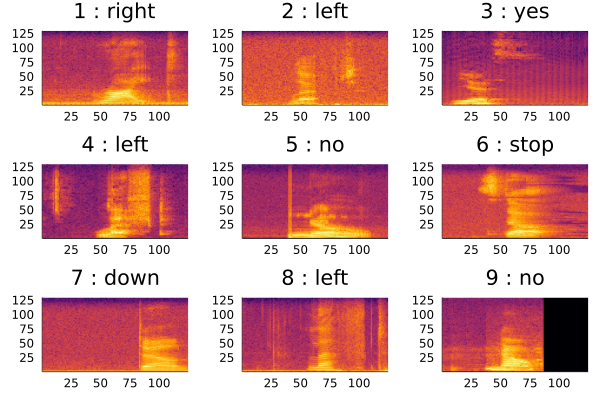

In [20]:
# Check data
rows = 3
cols = 3
n = rows*cols

figs = [
    plot_spectrogram(train_ds_x[:,:,1,i],"$i : $(first(commands[train_ds_y[:,i]]))")
    for i=1:n
]

plot(figs...,layout=(rows,cols))

In [21]:
# Finally use the DataLoader

trainingData = Flux.DataLoader((train_ds_x, train_ds_y), batchsize=64,shuffle=true)
valData = Flux.DataLoader((val_ds_x, val_ds_y), batchsize=64)

MLUtils.DataLoader{Tuple{Array{Float32, 4}, Flux.OneHotArray{UInt32, 8, 1, 2, Vector{UInt32}}}, Random._GLOBAL_RNG, Val{nothing}}(([0.00025893794 0.0010026188 … 5.6383942f-5 0.0001300303; 0.0006515251 0.0007230164 … 0.0001715088 0.00012701692; … ; 0.26725334 2.4594007 … 6.4498425f-5 2.4139881f-5; 0.09155799 2.623827 … 0.00010781461 8.1934035f-5;;;; 3.9727101 2.0214796 … 9.256638f-5 1.001358f-5; 3.956152 2.0073693 … 7.3516814f-5 0.00012350082; … ; 3.9542108 2.0100462 … 5.86092f-5 2.1457672f-5; 3.9314146 1.9622632 … 5.273865f-6 5.4836273f-5;;;; 0.10119082 0.04924748 … 5.161309f-5 4.0415674f-5; 0.114813216 0.06182654 … 8.226938f-5 1.0624528f-5; … ; 0.14132476 0.07903145 … 0.000108482294 0.0001501739; 0.104957 0.04936823 … 0.000118248274 0.00010231137;;;; … ;;;; 0.0012849979 0.0034379761 … 0.00020606433 0.00010989717; 0.00034580292 0.0015371578 … 0.00022451942 0.0002482736; … ; 0.0046653654 0.0042937067 … 7.258831f-5 5.80356f-5; 0.01118025 0.008695826 … 0.00021625192 0.00033841655;;;; 0.00

In [22]:
# ds_mean = sum(train_ds_x) / prod(size(train_ds_x))
# ds_sqrt_var = sqrt(sum((train_ds_x .- ds_mean).^2) / prod(size(train_ds_x)))
using Statistics
# Compute mean 
ds_mean =  mean(train_ds_x)
ds_sqrt_var = sqrt(var(train_ds_x))

0.7704598f0

In [23]:
# Model Definition

model = Chain(
    Upsample(:bilinear,size=(32,32)),
    x->(x .- ds_mean) ./ ds_sqrt_var,
    Conv((3,3),1=>32, Flux.relu),
    Conv((3,3),32=>64, Flux.relu),
    MaxPool((2,2)),
    Dropout(0.25),
    Flux.flatten,
    Dense(12544=>128,relu),
    Dropout(0.5),
    Dense(128=>length(commands)),
)
# Checking 
model(train_ds_x[:,:,1:1,1:2])

8×2 Matrix{Float32}:
 -0.0853529   -0.104751
 -0.172767    -0.0940717
 -0.0920751   -0.0695928
  0.0847408    0.0546148
 -0.00154859   0.00908563
 -0.0982046   -0.0566646
 -0.276476    -0.269796
  0.0556729    0.176731

In [24]:
# Loss Function
function loss(x,y)
    ŷ = model(x)
    Flux.Losses.logitcrossentropy(ŷ,y)
end

# Check Accuracy
function getAccuracy(m,d)
    acc = 0
    for (x,y)=d
        ŷ = model(x)
        acc += sum(Flux.onecold(ŷ) .== Flux.onecold(y)) / size(x)[end]
    end
    acc/length(d)
end

# Total Loss
function loss_tot(d)
    l = 0
    for (x,y) = d
        l+= loss(x,y)
    end
    return l/length(d)
end

loss_tot (generic function with 1 method)

In [25]:
# Goes very slow :''(
@show loss_tot(valData) 
@show getAccuracy(model,valData)

loss_tot(valData) = 2.098343f0
getAccuracy(model, valData) = 0.11778846153846154


0.11778846153846154

In [26]:
opt = Flux.Optimise.ADAM()
ps = Flux.params(model)
loss_record = []
acc_record = []
#evalcb() = println("Loss: $(loss_tot(valData))")
for epoch=1:10
    testmode!(model,false)
    Flux.train!(
        loss,
        ps,
        trainingData,
        opt,
     #   cb=Flux.throttle(evalcb,10),
    )
    testmode!(model,true)
    l = loss_tot(valData)
    acc = getAccuracy(model,valData)
    println("E$(epoch): L: $l , Acc: $acc")
    push!(loss_record,l)
    push!(acc_record,acc)
end

E1: L: 1.3796934 , Acc: 0.5829326923076923
E2: L: 0.9776535 , Acc: 0.6742788461538461
E3: L: 0.75953263 , Acc: 0.7632211538461539
E4: L: 0.6655951 , Acc: 0.7788461538461539
E5: L: 0.6620354 , Acc: 0.7740384615384616
E6: L: 0.59055674 , Acc: 0.8004807692307693
E7: L: 0.51962954 , Acc: 0.8341346153846154
E8: L: 0.52744794 , Acc: 0.8269230769230769
E9: L: 0.5221025 , Acc: 0.8197115384615384
E10: L: 0.51355535 , Acc: 0.8317307692307693


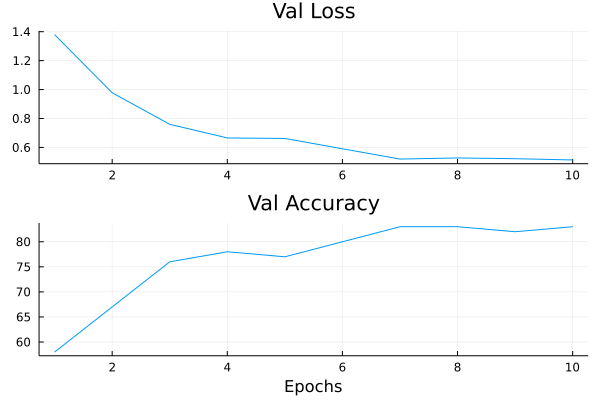

In [35]:
# Plot Loss and Accuracy
fig1 = plot(
    loss_record,
    title = "Val Loss",
    legend=false,
    # xlabel="Epochs",
)
fig2 = plot(
    round.(acc_record.*100),
    title = "Val Accuracy",
    xlabel="Epochs",
    legend=false,
)
plot(fig1, fig2, layout=(2,1))

In [46]:
ŷ = Flux.onecold(model(test_ds_x))
y = Flux.onecold(test_ds_y)
test_acc = sum(y .== ŷ) ./ length(y)
println("Test Accuracy: $(test_acc * 100)")


Test Accuracy: 84.5


8×8 Matrix{Int64}:
 77  13   0   4   1   0   0   1
 10  92   1  14   0   1   0   1
  3   1  81   2   3   0   4   5
  1  12   1  80   1   0   0   1
  1   2   4   0  82   0   0   0
  3   3   2   1   1  96   6   2
  0   3   1   0   1   2  88   0
  5   0   3   4   0   0   0  80

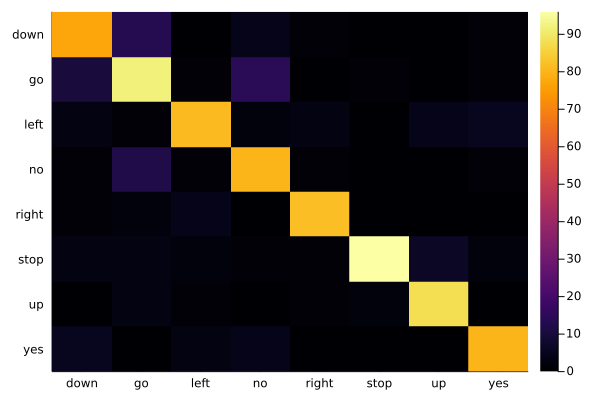

In [56]:
# Plot Confusion Matrix

conf_mat = [
    sum((y .== i) .& (ŷ .== j))
    for i=1:8, j=1:8
]
display(conf_mat)

heatmap(
    conf_mat,
    yflip = true,
    yticks = (1:8,commands),
    xticks = (1:8,commands),
)